# Plot abrupt4xCO2 anomalies and fit linear response using all available members

In [324]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import signal
import pandas as pd
import os

from scipy import optimize
import random as rd
import importlib
import my_functions as f
importlib.reload(f) # needed to load new changes in my_functions

<module 'my_functions' from '/Users/hege-beatefredriksen/OneDrive - UiT Office 365/Papers/ForcingCMIP6/CMIP6-forcing/notebooks/my_functions.py'>

In [325]:
exp = 'abrupt-4xCO2'

directory = '../Processed_data/Global_annual_anomalies'
model_names = [ f.name for f in os.scandir(directory) if f.is_dir() and f.name !='.ipynb_checkpoints']
model_names.sort()
model_names;





In [311]:
for model in ['NorESM2-LM']:
#for model in model_names:
    if os.path.isdir(os.path.join(directory, model, exp)) == False:
        continue
    members = f.find_members(model, exp)
        
    if model == 'GISS-E2-1-G':
        # exclude member which seems to start after year 150
        members.remove('r1i1p1f3')
    print(model, members)
    
    #f.plot_allvar(model, exp, members)
    parameters_names = ['tau1', 'tau2', 'tau3', 'tau4', 'a_1', 'a_2', 'a_3', 'a_4', 'b_1', 'b_2', 'b_3', 'b_4', 'F2x', 'T2x','rnorm']
    df_par = pd.DataFrame(columns=parameters_names)

    ii = 0
    while ii < 1000:
        par_list = f.fbpar_estimation(model, exp, members)
        if len(par_list) == 0:
            continue
        else:
            [timescales, a_n, b_n, rnorm1, rnorm2] = par_list
        
        if a_n[-1]<0: # response at multimillennial time scale should be positive
            continue
        if rnorm2 > rnorm1*1.1: 
            # response at multimillenial time scale should be close to 0 for the first 150 years
            # and should therefore not lead to a significantly worse fit if included
            continue
        #print(a_n)
        F2x = np.sum(b_n)/2
        T2x = np.sum(a_n)/2
        # write results to table
        pars = np.concatenate((timescales, a_n, b_n, F2x, T2x, rnorm1), axis=None)
        df_par = df_par.append(pd.DataFrame([pars], columns=parameters_names), ignore_index=True)
        #if ii % 100 == 0:
        #    print(ii)
        ii += 1


    # save file
    #modelfilename = model + '_1000parameters.txt' # shortest time scale 1-6 yrs
    #df_par.to_csv('../Estimates/1000parameters_4xCO2_allmembers/' + modelfilename, sep='\t')


ACCESS-CM2 ['r1i1p1f1']
ACCESS-ESM1-5 ['r1i1p1f1']
AWI-CM-1-1-MR ['r1i1p1f1']
BCC-CSM2-MR ['r1i1p1f1']
BCC-ESM1 ['r1i1p1f1']
CAMS-CSM1-0 ['r1i1p1f1', 'r2i1p1f1']
CAS-ESM2-0 ['r1i1p1f1']
CESM2 ['r1i1p1f1']
CESM2-FV2 ['r1i1p1f1']
CESM2-WACCM ['r1i1p1f1']
CESM2-WACCM-FV2 ['r1i1p1f1']
CIESM ['r1i1p1f1']
CMCC-CM2-SR5 ['r1i1p1f1']
CNRM-CM6-1 ['r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2', 'r4i1p1f2', 'r5i1p1f2', 'r6i1p1f2']
CNRM-CM6-1-HR ['r1i1p1f2']
CNRM-ESM2-1 ['r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2']
CanESM5 ['r1i1p1f1', 'r1i1p2f1']
E3SM-1-0 ['r1i1p1f1']
EC-Earth3 ['r3i1p1f1', 'r8i1p1f1']
EC-Earth3-Veg ['r1i1p1f1']
FGOALS-f3-L ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1']
FGOALS-g3 ['r1i1p1f1']
FIO-ESM-2-0 ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1']
GFDL-CM4 ['r1i1p1f1']
GFDL-ESM4 ['r1i1p1f1']
GISS-E2-1-G ['r102i1p1f1', 'r1i1p1f1', 'r1i1p3f1', 'r1i1p5f1']
GISS-E2-1-H ['r1i1p1f1', 'r1i1p3f1']
GISS-E2-2-G ['r1i1p1f1']
HadGEM3-GC31-LL ['r1i1p1f3']
HadGEM3-GC31-MM ['r1i1p1f3']
IITM-ESM ['r1i1p1f1']
INM-CM4-8 ['r1i1p1f1']
IN

In [312]:
df_par

tau1       tau2        tau3    tau4       a_1       a_2       a_3  \
0    1.558347  12.512548  132.302248  5000.0  2.310843  3.250424  3.383866   
1    1.764628   9.210614  237.425392  5000.0  1.723338  3.814727  5.180441   
2    5.597970  42.540116  135.335593  5000.0  4.656907  1.774973  2.133508   
3    2.543342  15.054310  152.380132  5000.0  2.887232  2.819979  3.431638   
4    3.955886  36.524570  136.278858  5000.0  4.058090  2.671177  1.621121   
..        ...        ...         ...     ...       ...       ...       ...   
995  3.287886  20.105815  206.720955  5000.0  3.423616  2.607664  3.512024   
996  5.109144  38.773115  120.239496  5000.0  4.478096  1.858504  2.104441   
997  1.724373  16.638136  127.833139  5000.0  2.731820  3.077219  2.893064   
998  4.482426  33.666584  204.193608  5000.0  4.179529  2.379246  2.440807   
999  1.094311   7.833005  237.103751  5000.0  1.226426  4.227810  5.407886   

          a_4       b_1       b_2       b_3       b_4       F2x       T2x  \
0    2.104916  2.530382  2.320285  2.093438  1.302212  4.123159  5.525025   
1    0.356017  2.330744  2.756782  3.184067  0.218820  4.245206  5.537262   
2    2.441774  3.848692  1.052142  1.335249  1.528176  3.882129  5.503581   
3    1.930899  2.932701  1.900904  2.111877  1.188302  4.066892  5.534874   
4    2.394562  3.604533  1.609885  1.095748  1.618532  3.964349  5.372475   
..        ...       ...       ...       ...       ...       ...       ...   
995  1.487437  3.251916  1.676994  2.184506  0.925197  4.019307  5.515371   
996  2.480718  3.742586  1.110024  1.349393  1.590666  3.896334  5.460879   
997  2.405446  2.963367  2.075367  1.762567  1.465491  4.133396  5.553774   
998  1.753506  3.631880  1.413525  1.645645  1.182252  3.936651  5.376545   
999  0.241710  2.093986  3.188882  3.298237  0.147417  4.364261  5.551916   

        rnorm  
0    1.322800  
1    1.800764  
2    1.864165  
3    1.370543  
4    1.420990  
..        ...  
995  1.408681  
996  1.717051  
997  1.278550  
998  1.563910  
999  1.926336  

[1000 rows x 15 columns]

# Plot results and save the best fit parameters

ACCESS-CM2
Fixed-SST forcing for member r1i1p1f1 is 7.951 W/m^2
ACCESS-ESM1-5
Fixed-SST forcing for member r1i1p1f1 is 7.04 W/m^2
AWI-CM-1-1-MR
AWI-ESM-1-1-LR
BCC-CSM2-MR
BCC-ESM1
CAMS-CSM1-0
CAS-ESM2-0
CESM2
Fixed-SST forcing for member r1i1p1f1 is 8.898 W/m^2
CESM2-FV2
CESM2-WACCM
CESM2-WACCM-FV2
CIESM
CMCC-CM2-SR5
CNRM-CM6-1
Fixed-SST forcing for member r1i1p1f2 is 7.985 W/m^2
CNRM-CM6-1-HR
CNRM-ESM2-1
Fixed-SST forcing for member r1i1p1f2 is 7.644 W/m^2
CanESM5
Fixed-SST forcing for member r1i1p2f1 is 7.605 W/m^2
CanESM5-CanOE
E3SM-1-0
E3SM-1-1
E3SM-1-1-ECA
EC-Earth3
Fixed-SST forcing for member r1i1p1f1 is 8.094 W/m^2
EC-Earth3-Veg
EC-Earth3-Veg-LR
FGOALS-f3-L
FGOALS-g3
FIO-ESM-2-0
GFDL-CM4
Fixed-SST forcing for member r1i1p1f1 is 8.234 W/m^2
GFDL-ESM4
Fixed-SST forcing for member r1i1p1f1 is 7.735 W/m^2
GISS-E2-1-G
Fixed-SST forcing for member r1i1p1f2 is 7.273 W/m^2
GISS-E2-1-G-CC
GISS-E2-1-H
GISS-E2-2-G
HadGEM3-GC31-LL
Fixed-SST forcing for member r1i1p1f3 is 8.081 W/m^2
HadGEM

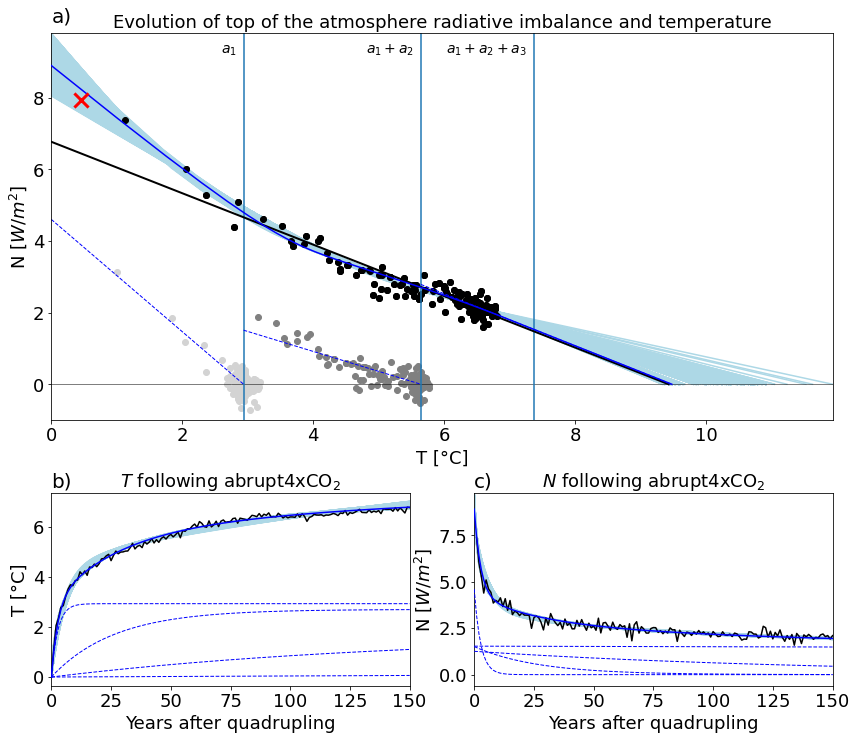

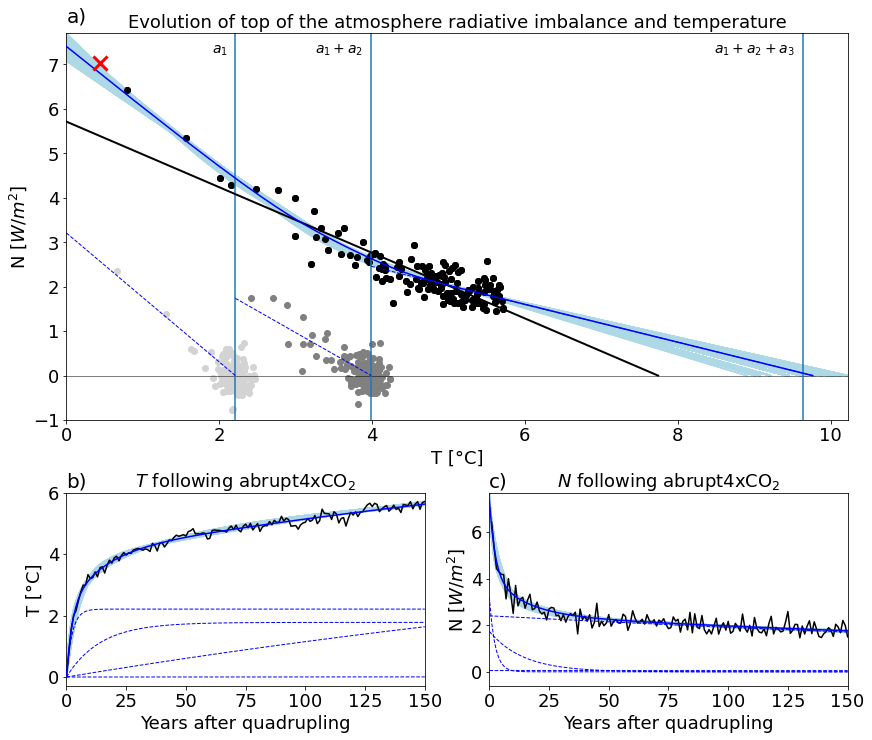

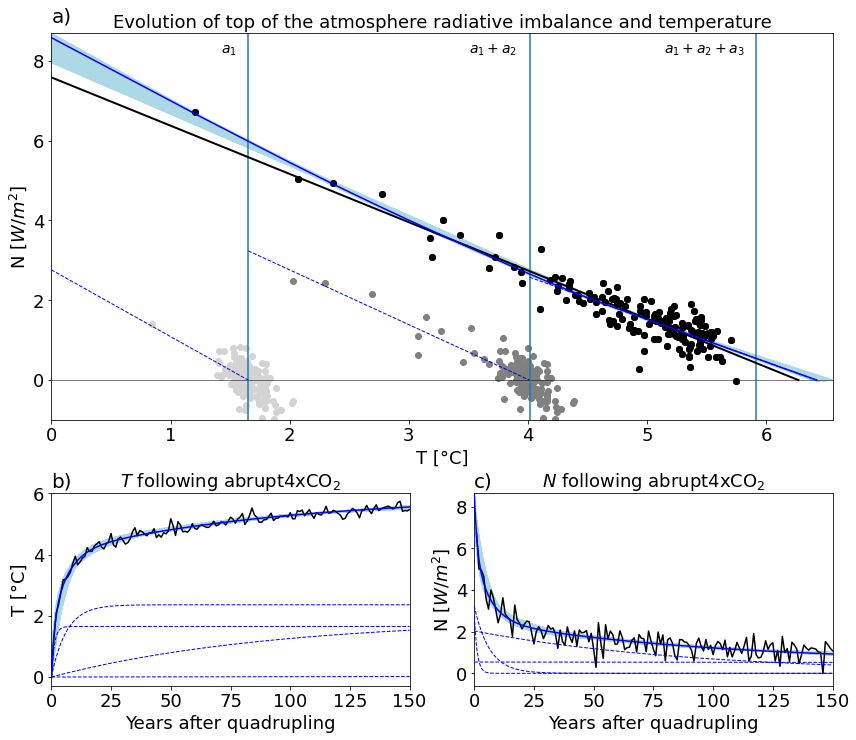

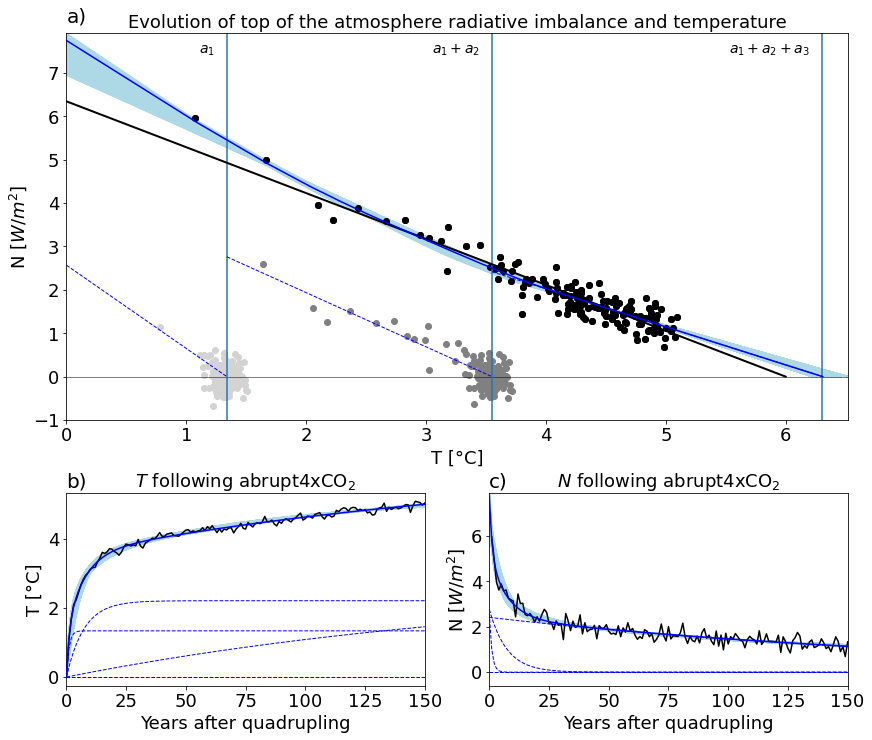

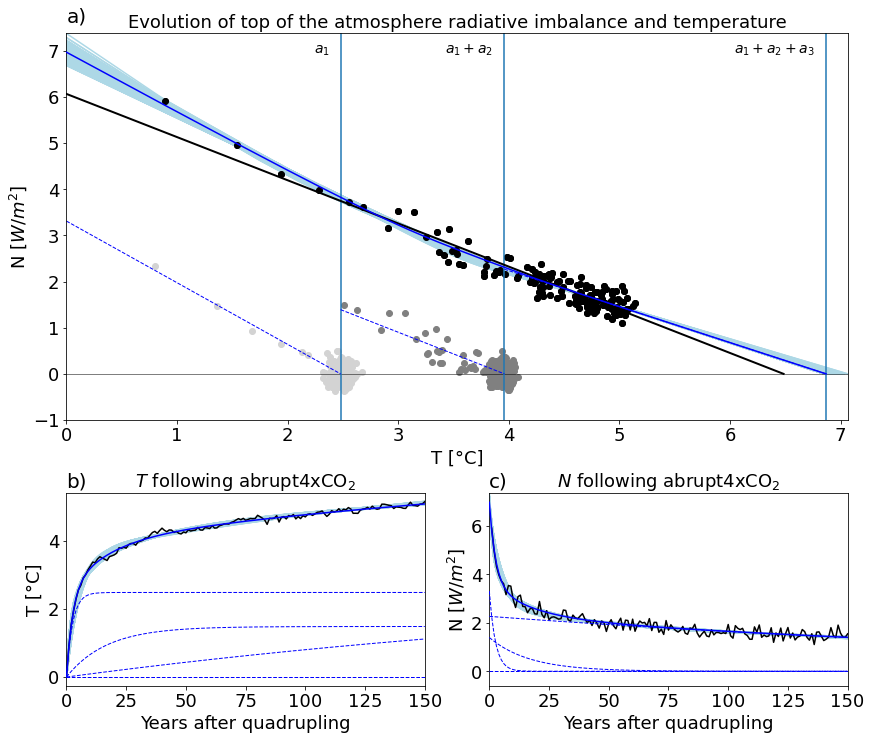

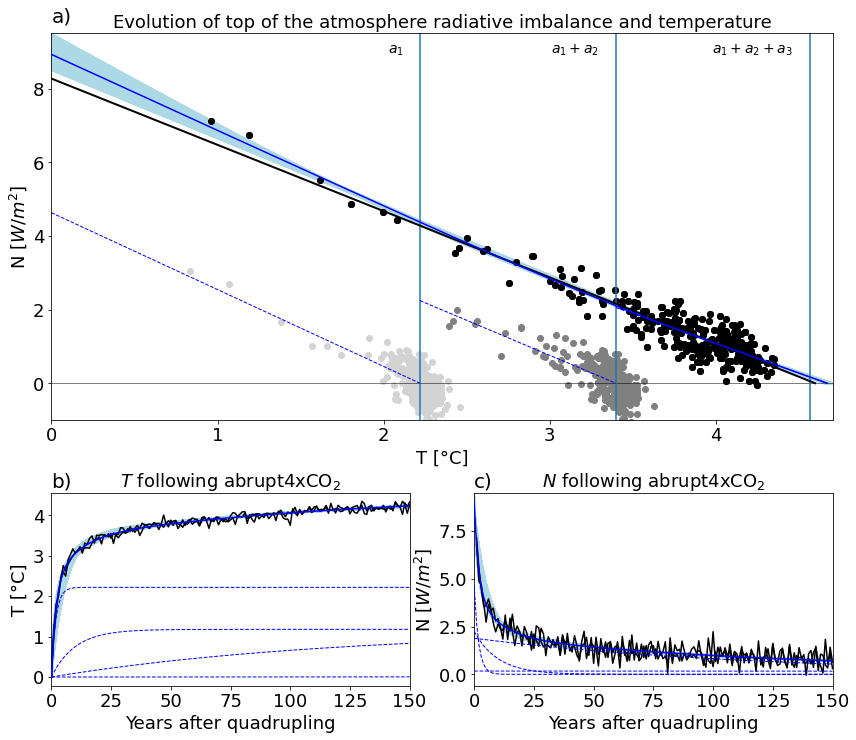

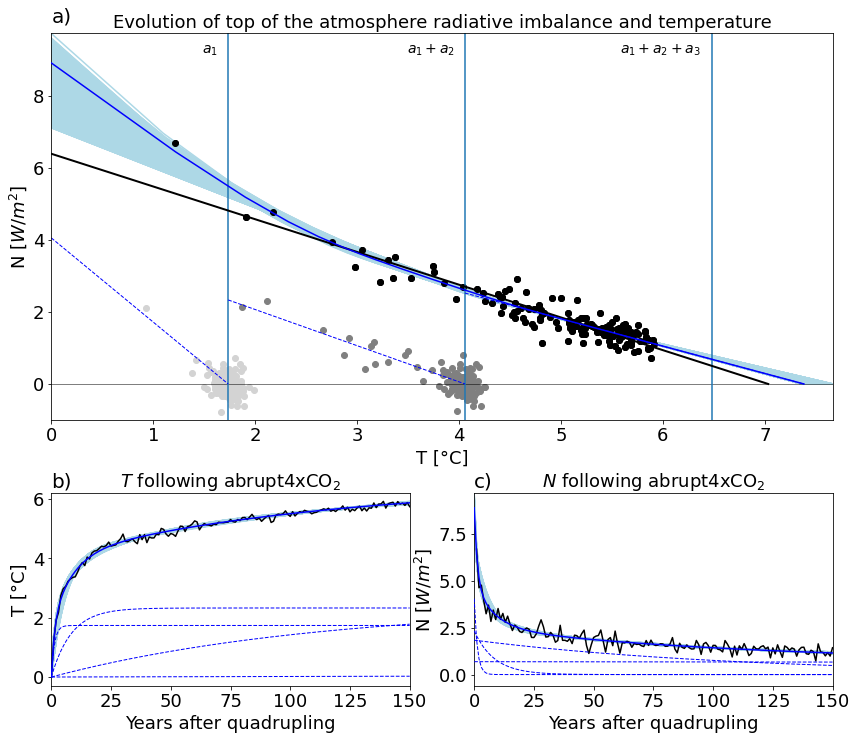

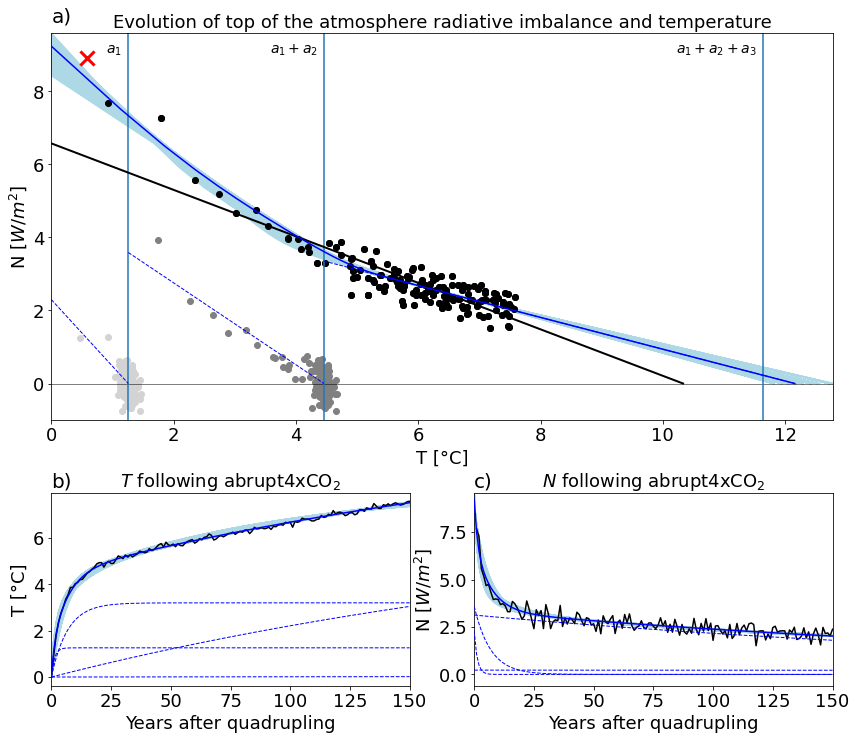

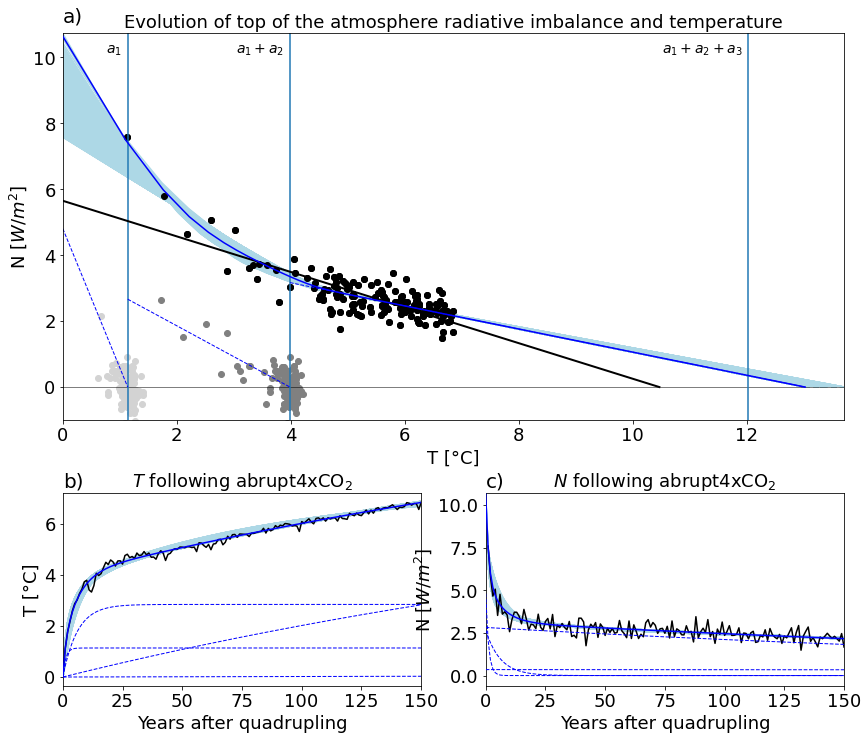

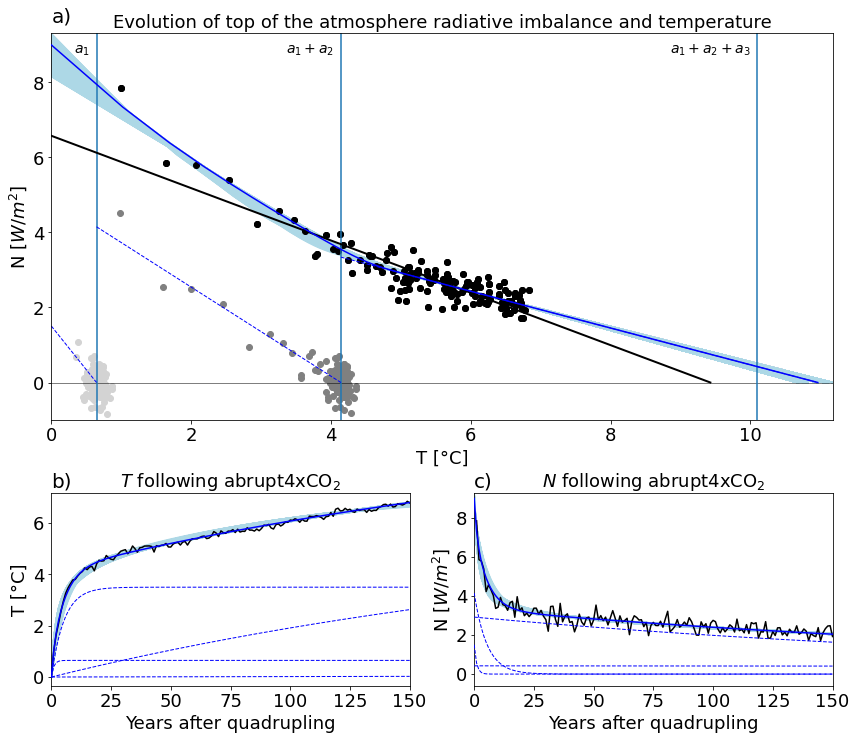

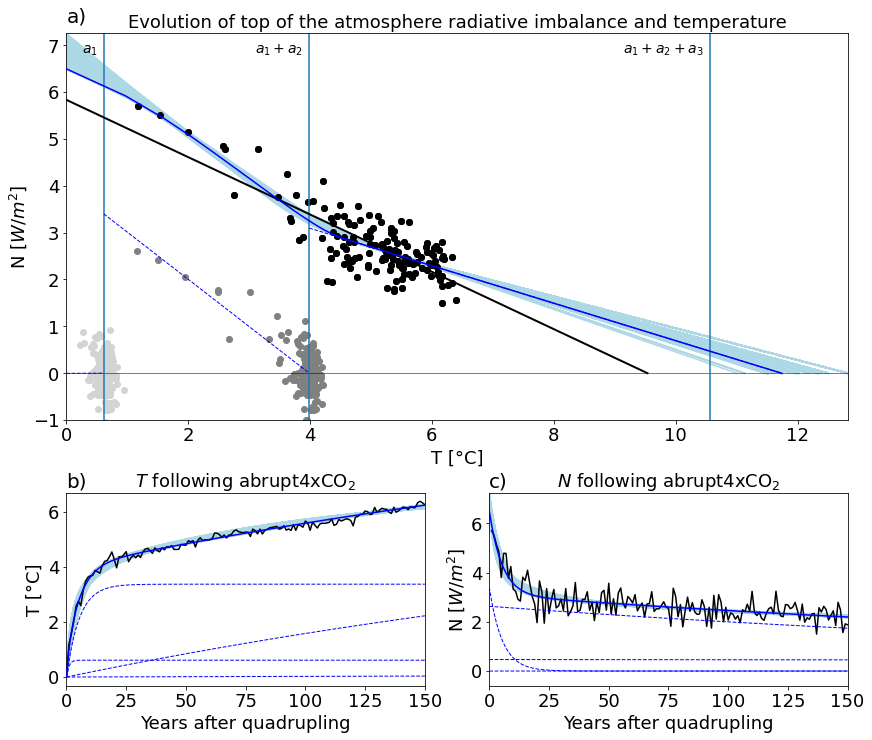

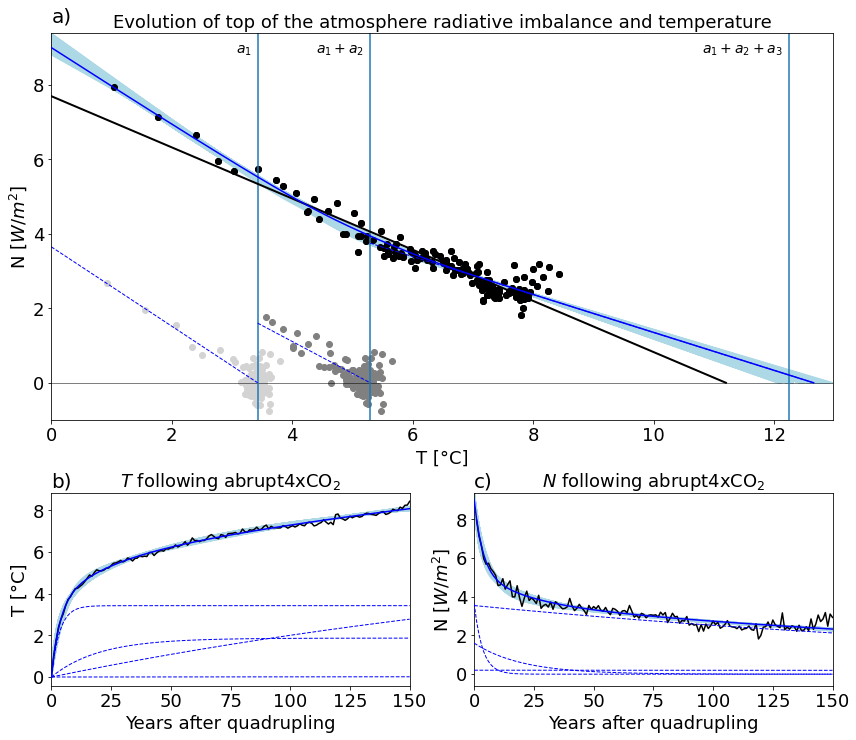

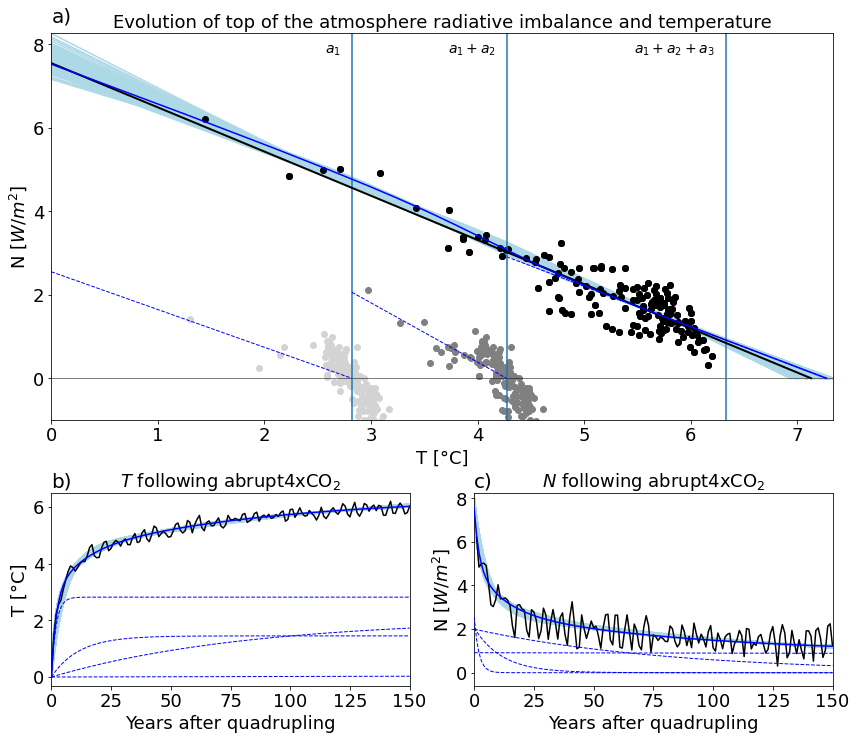

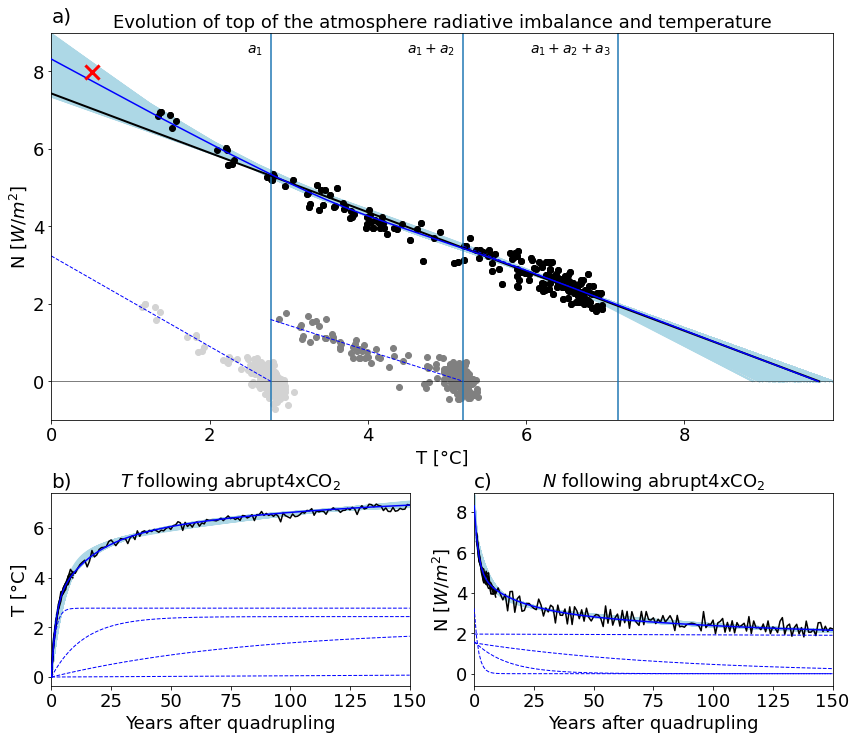

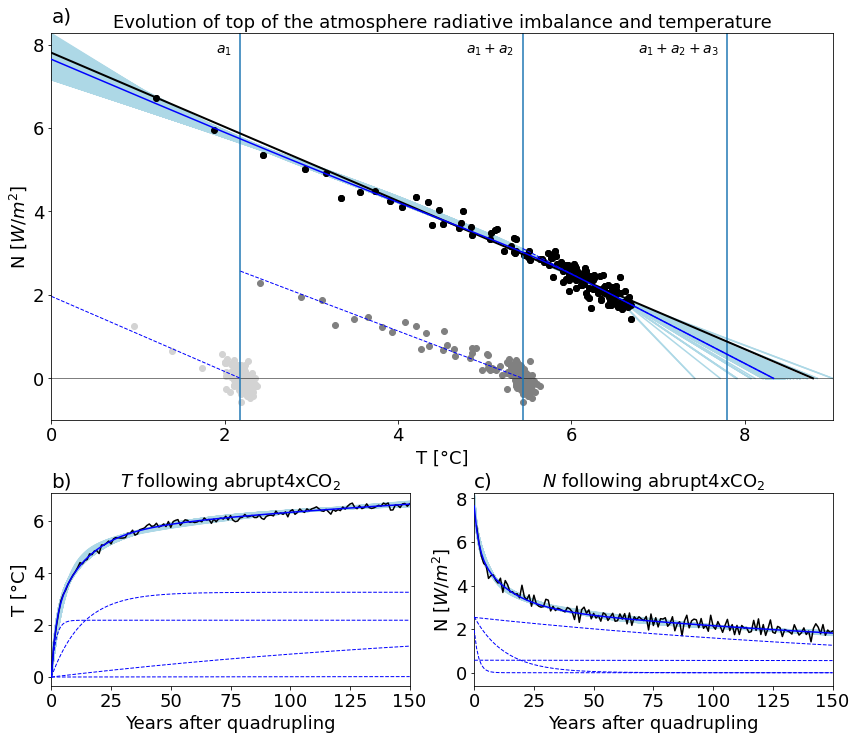

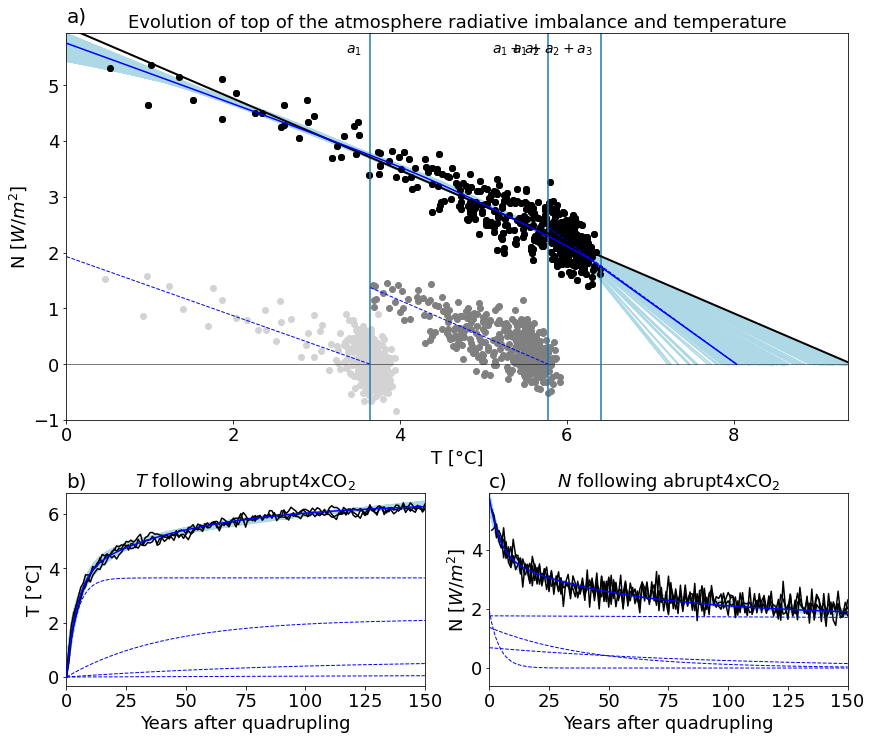

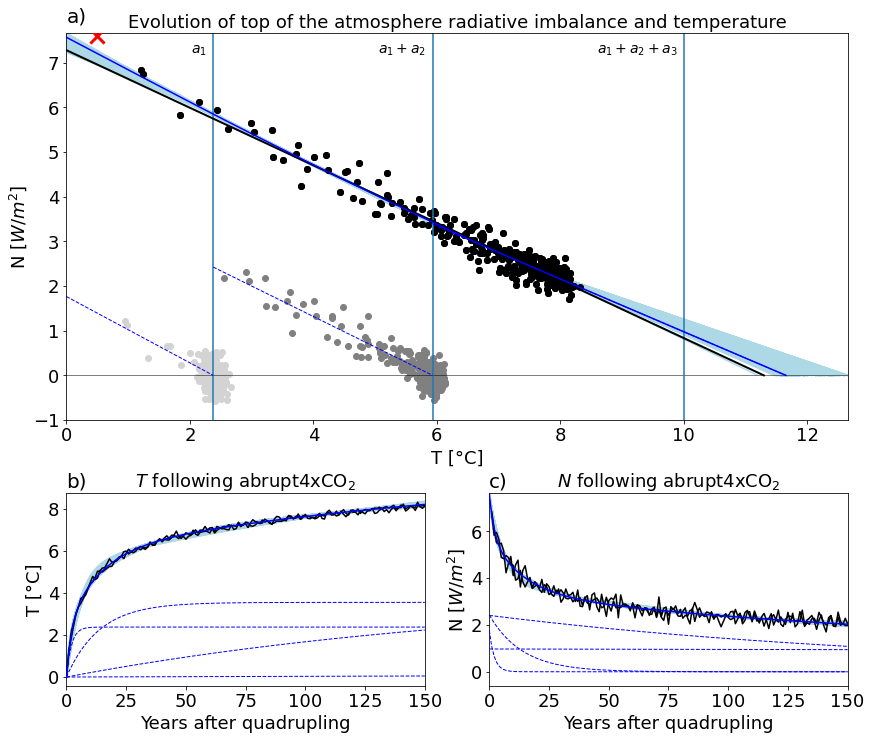

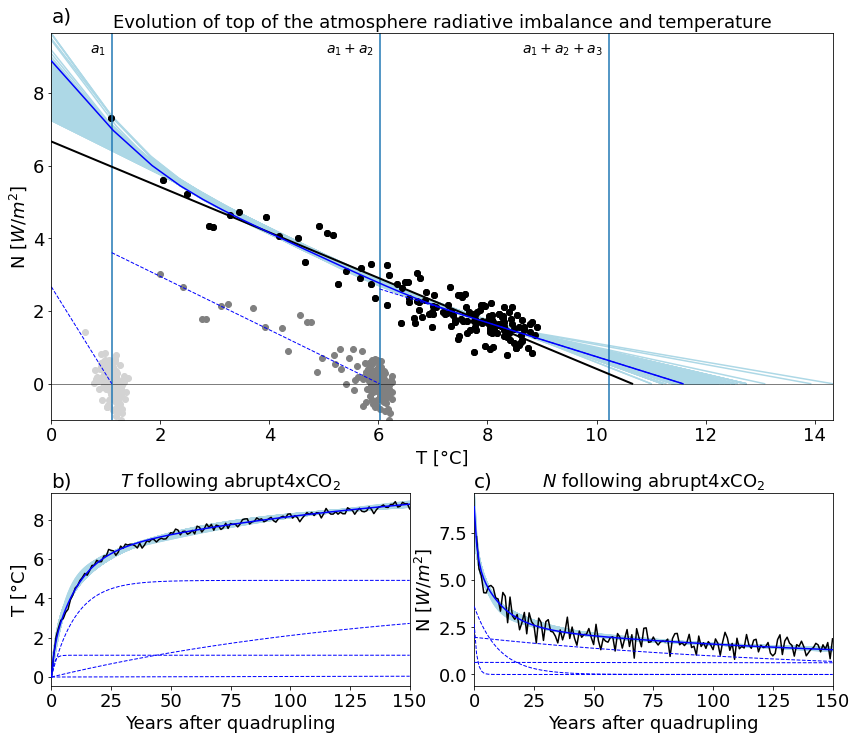

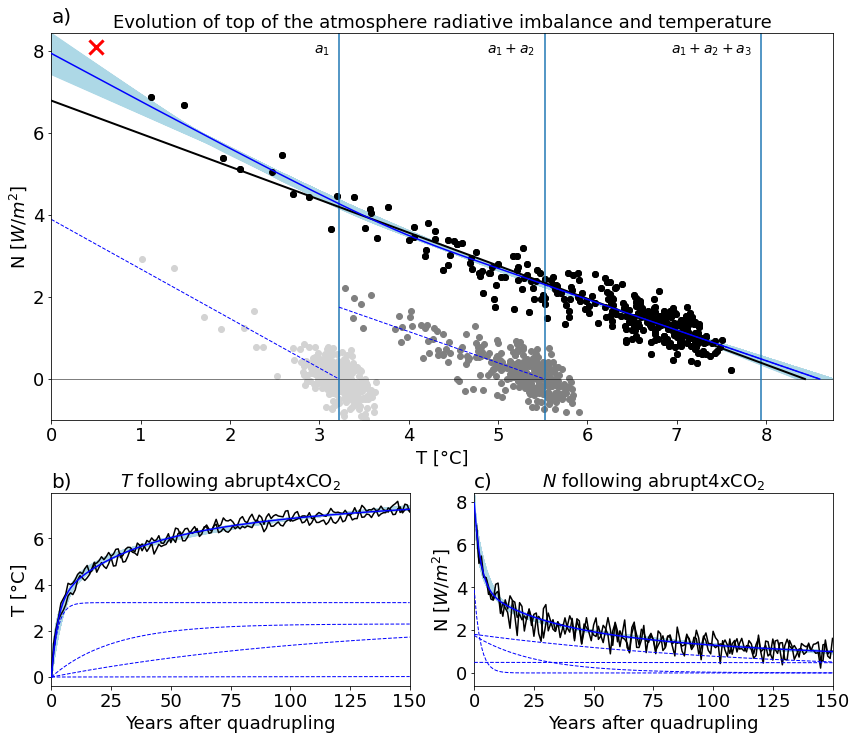

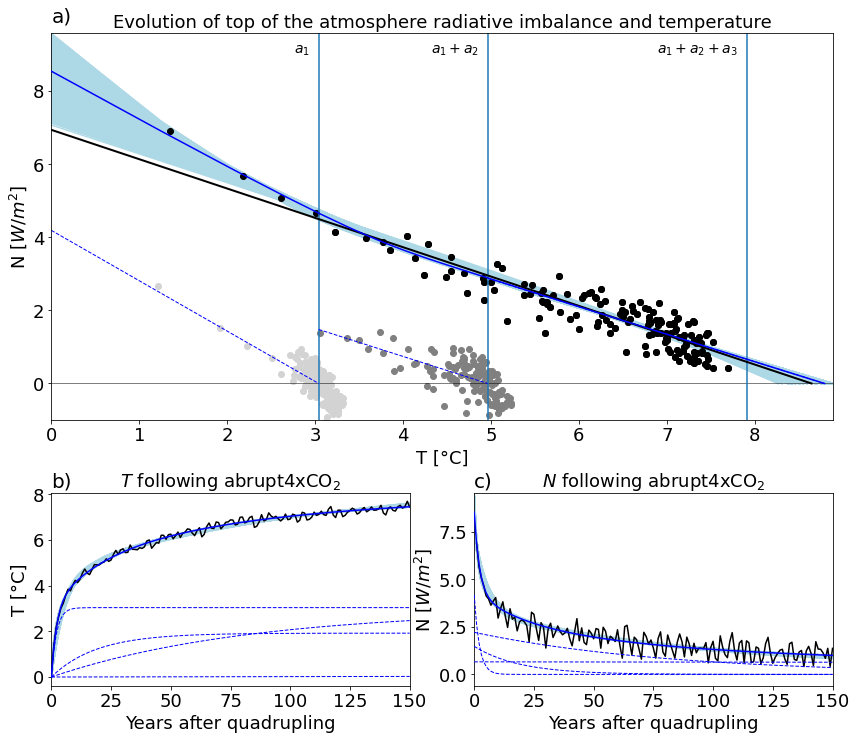

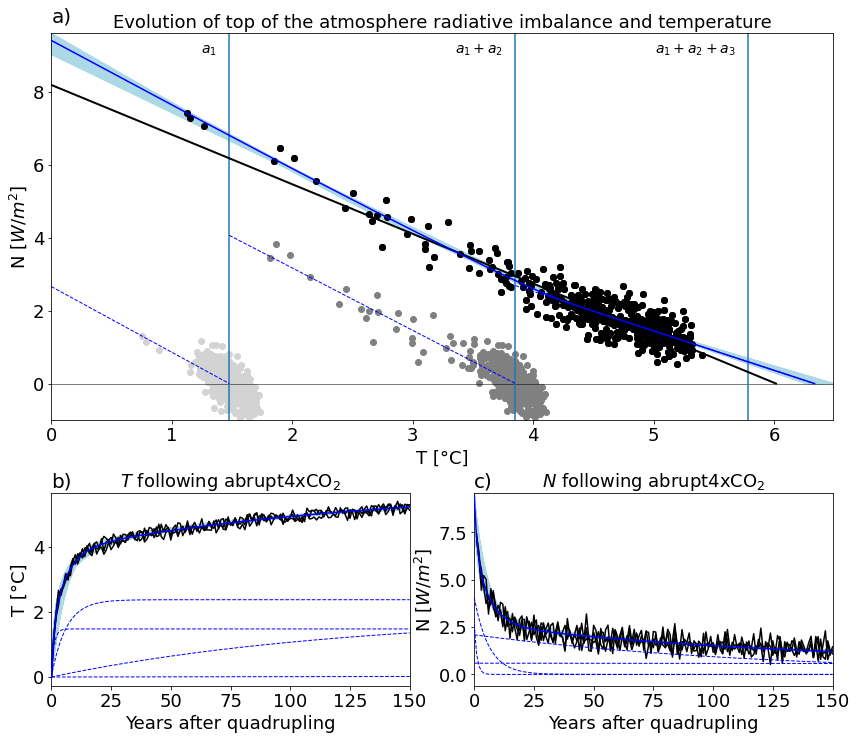

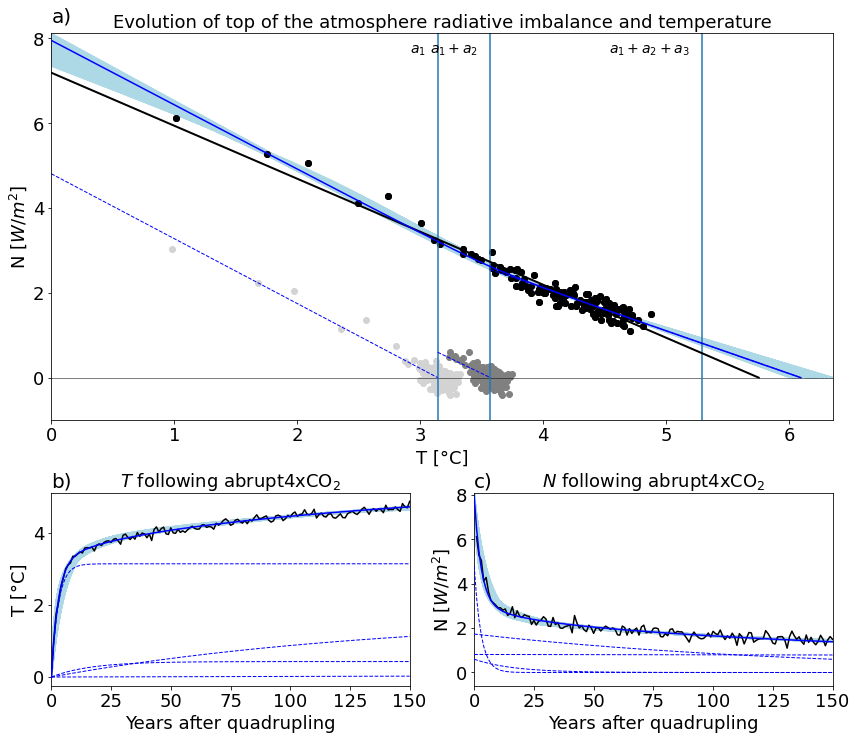

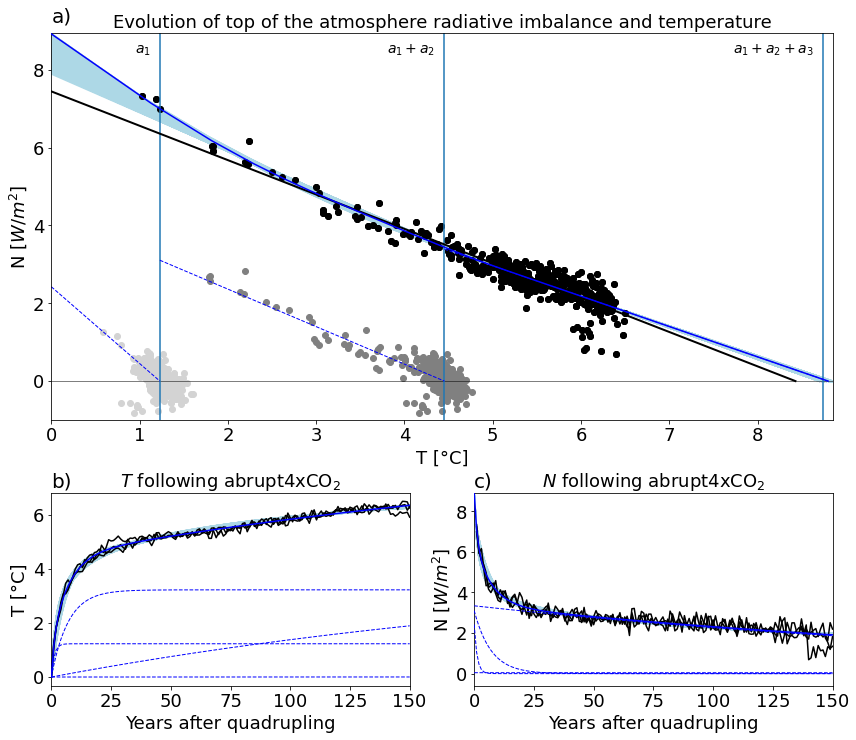

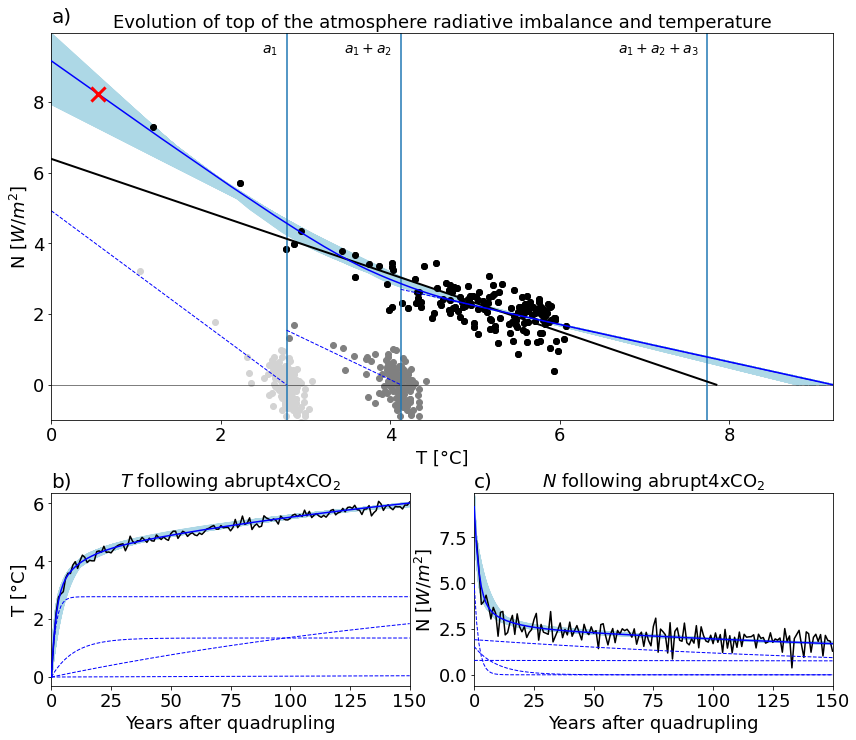

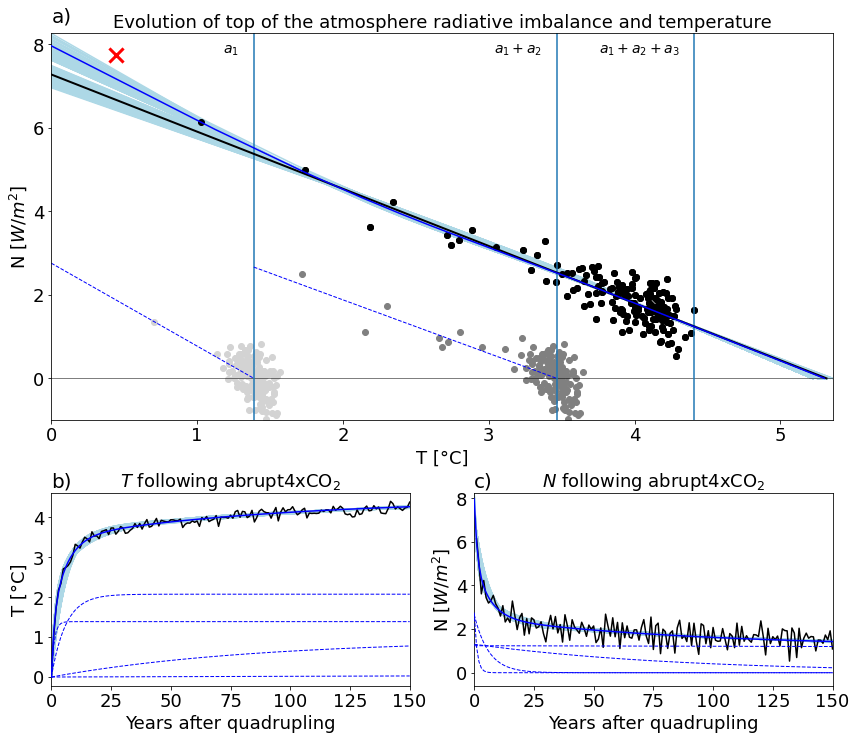

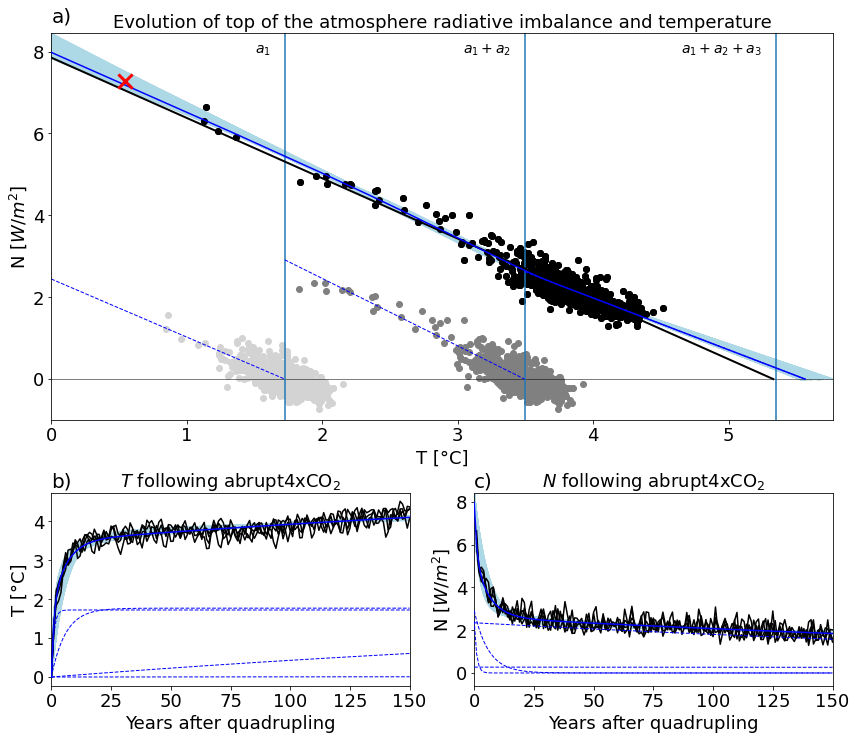

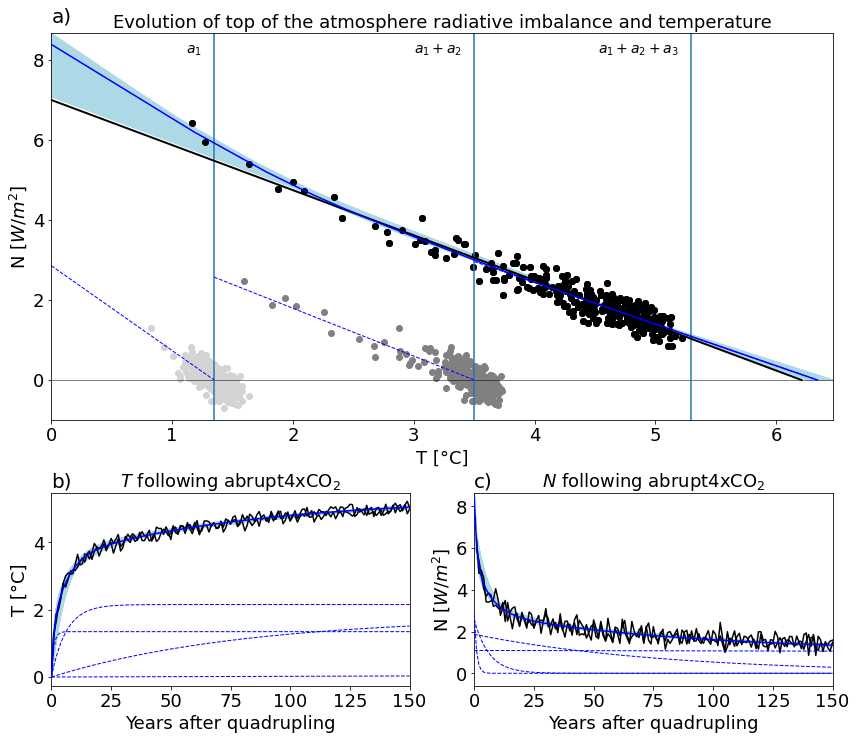

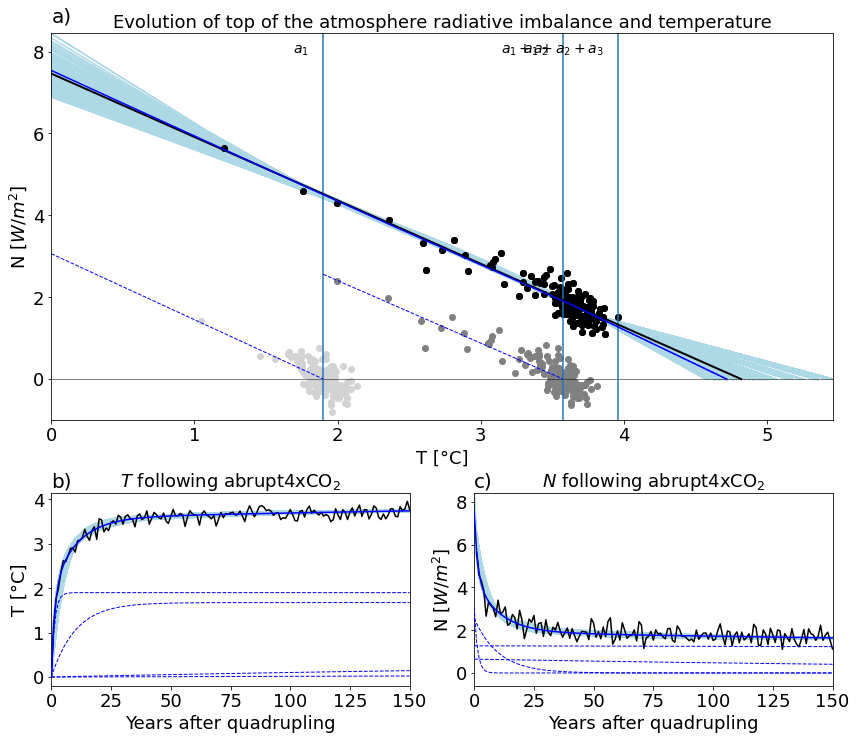

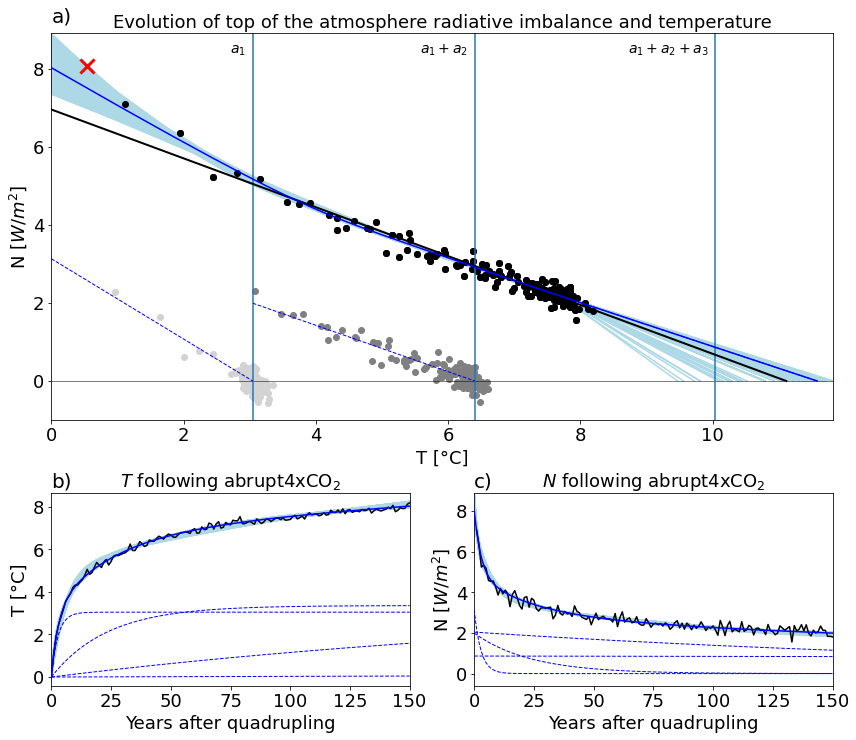

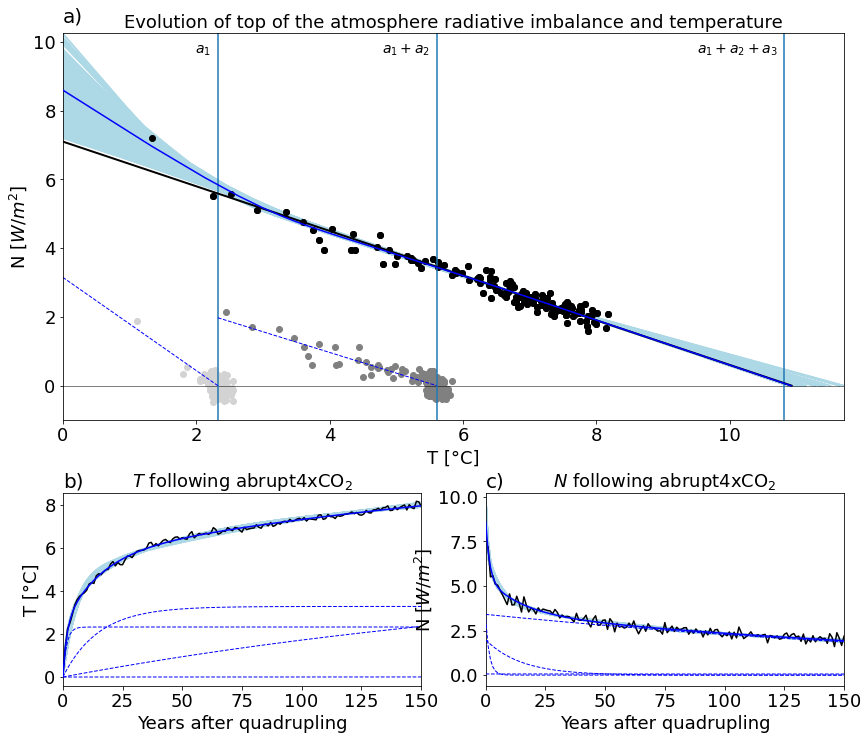

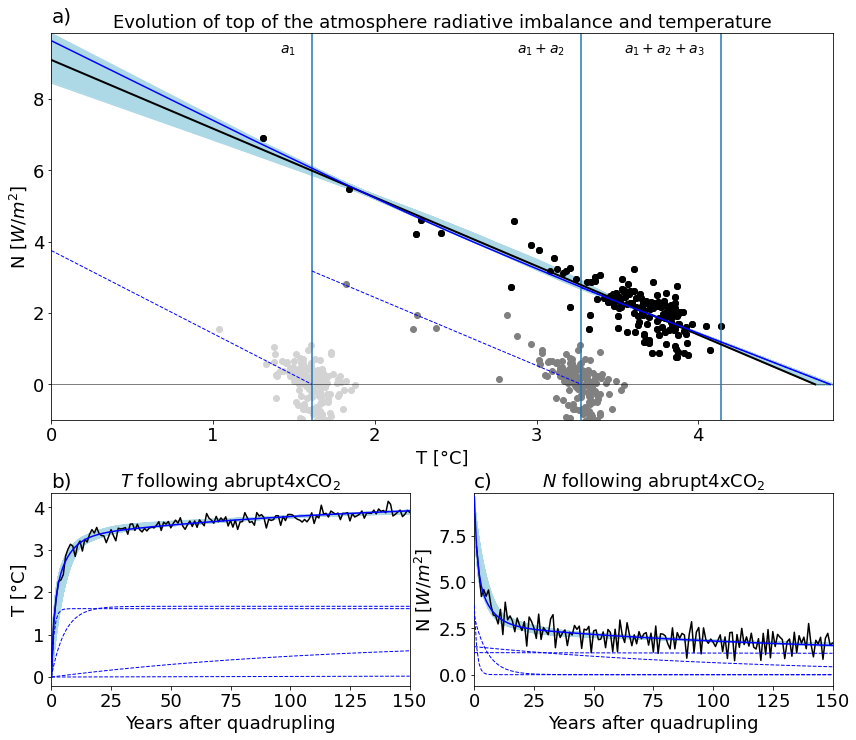

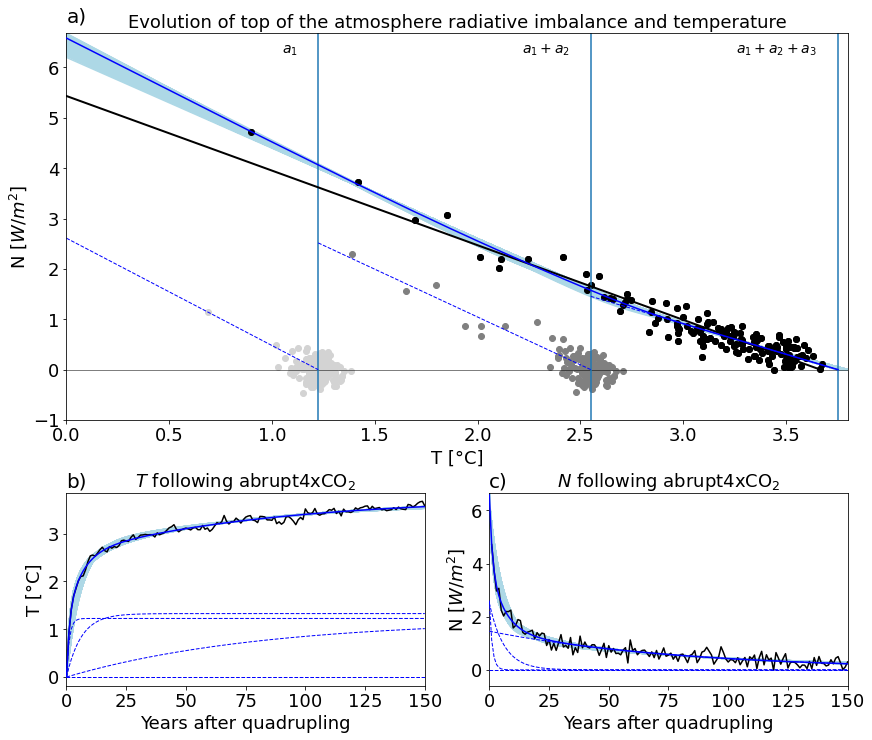

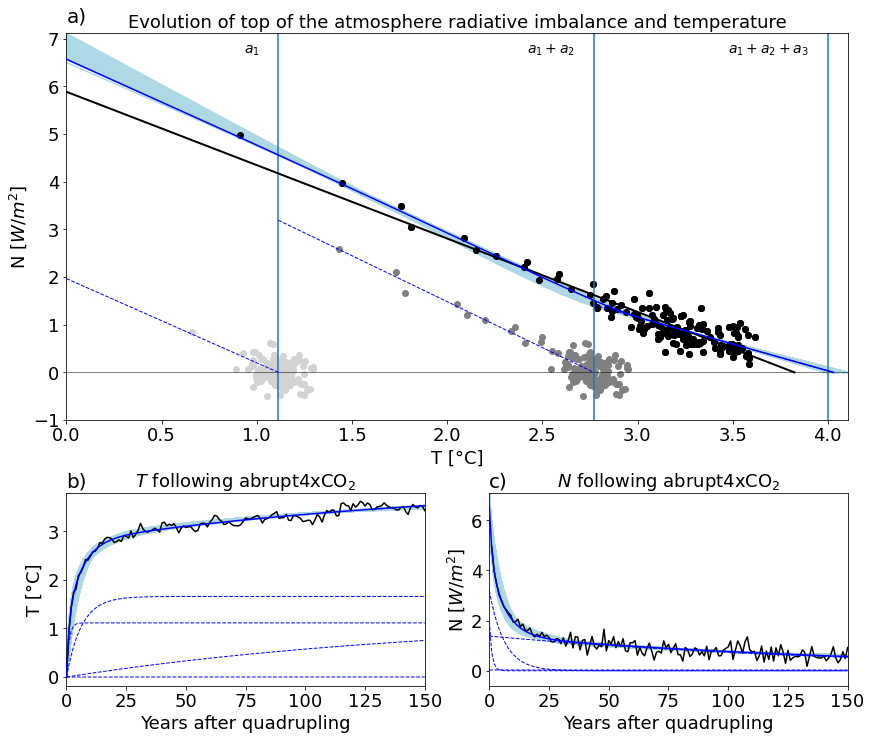

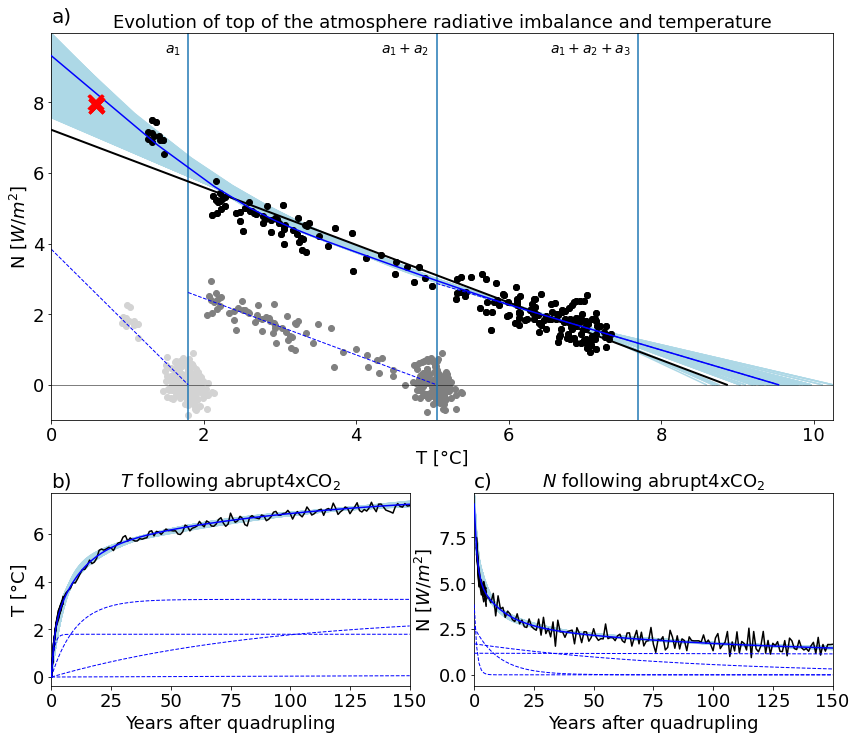

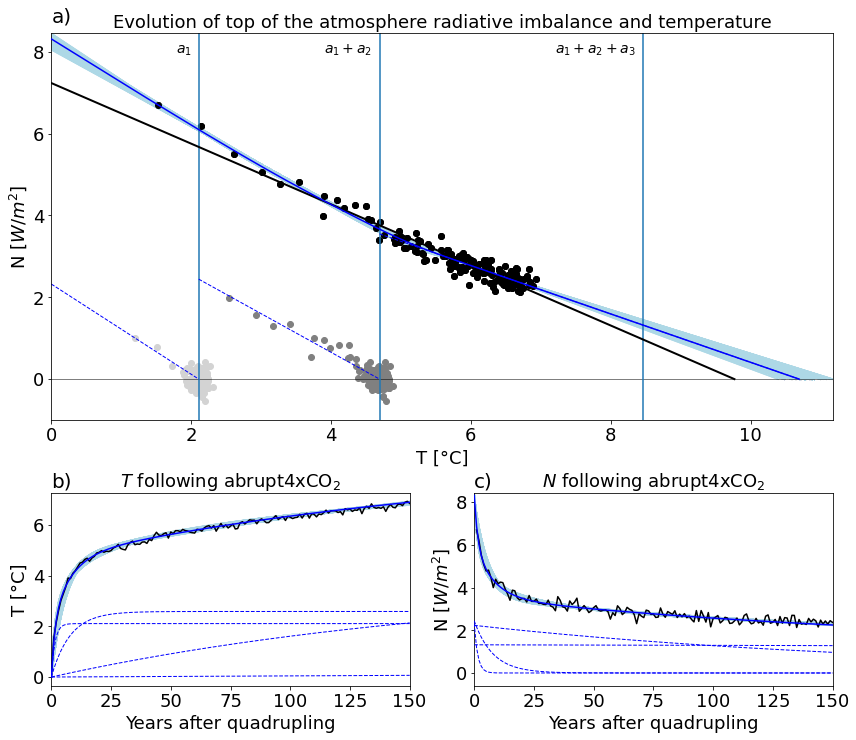

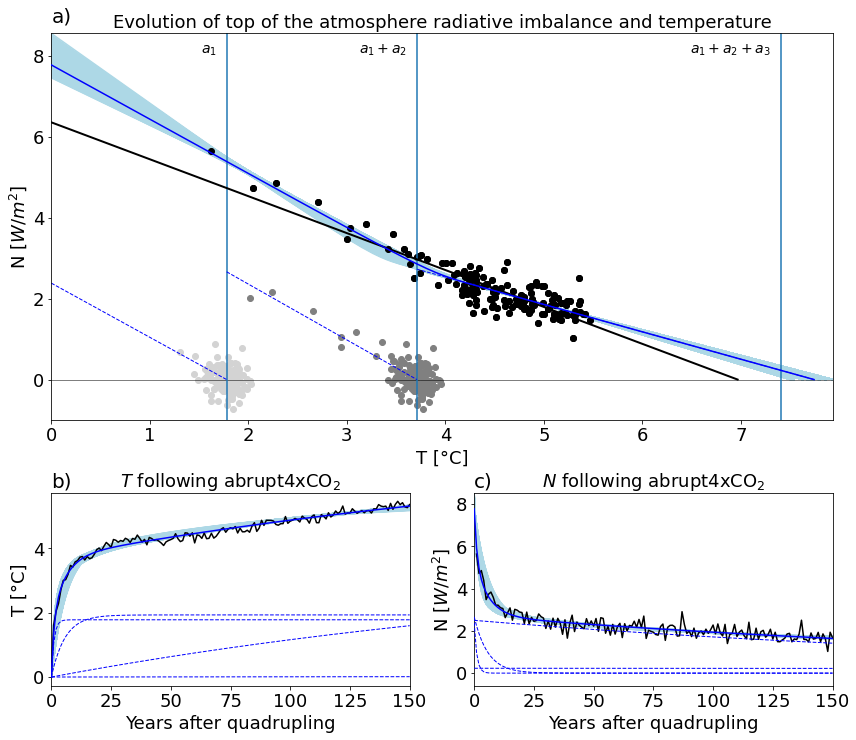

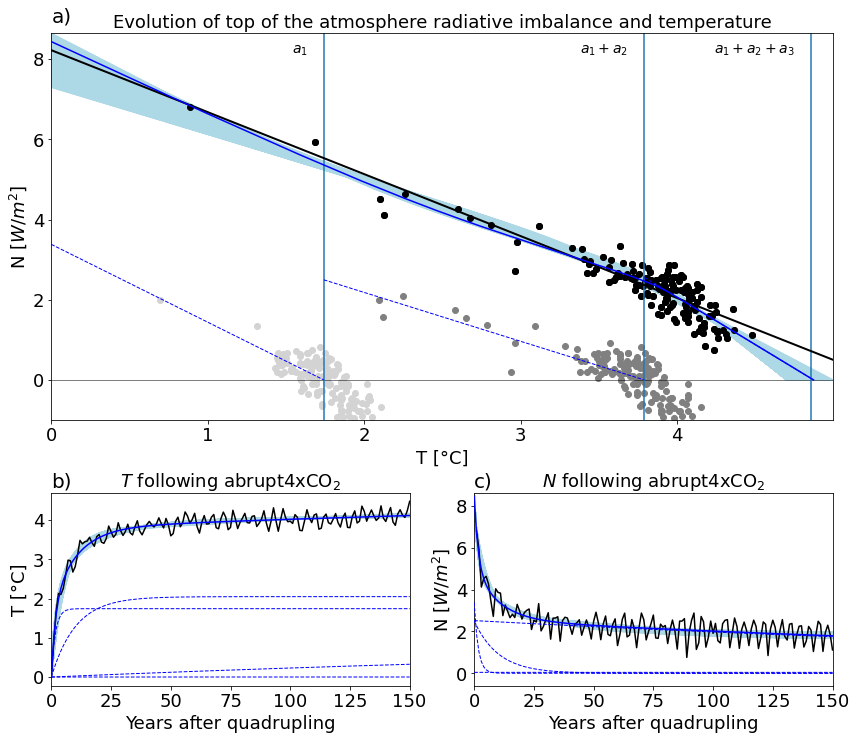

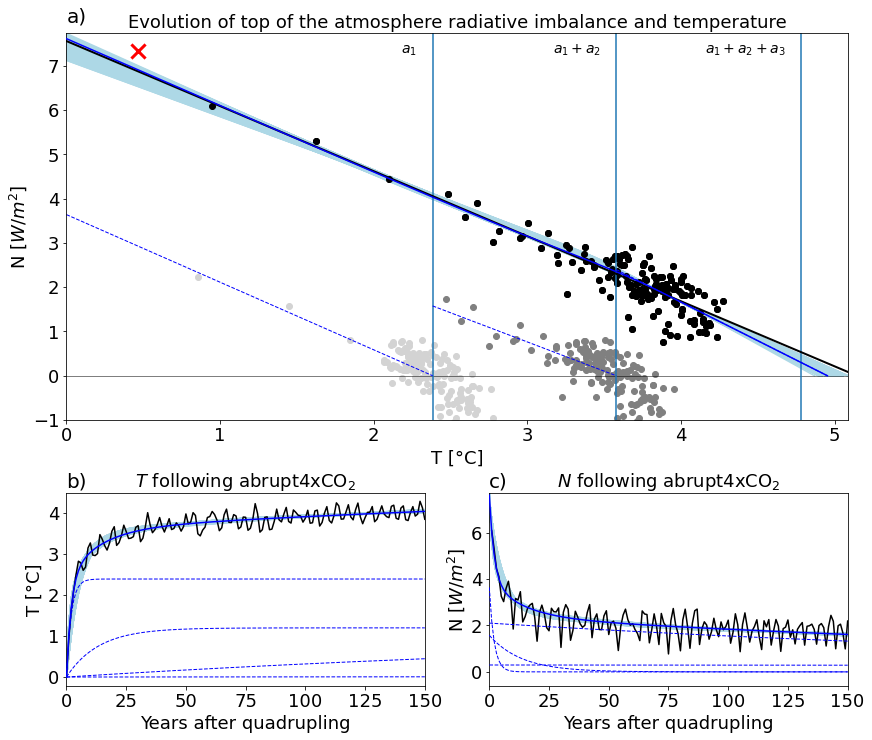

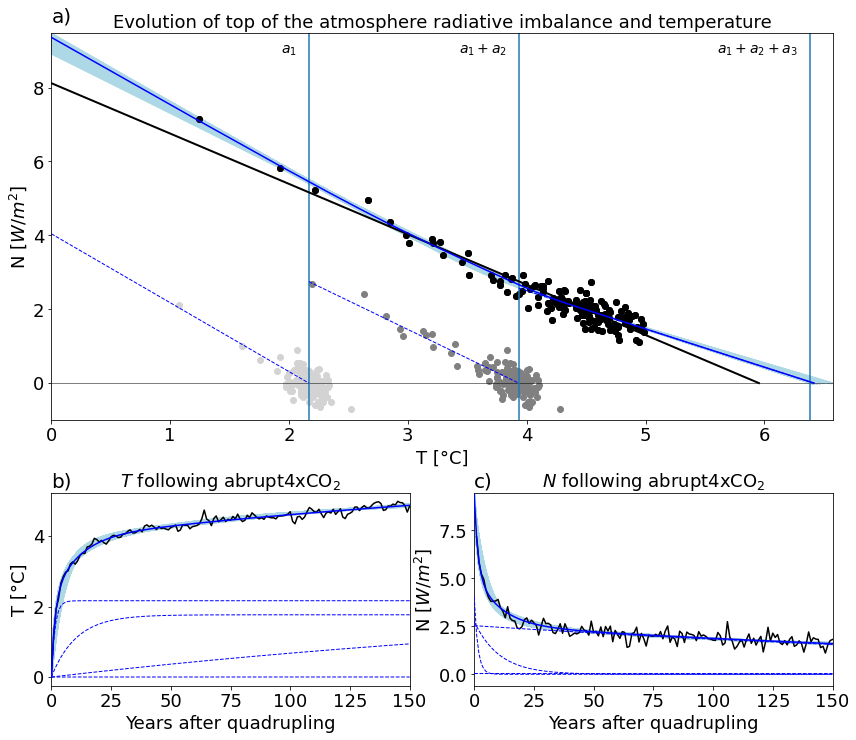

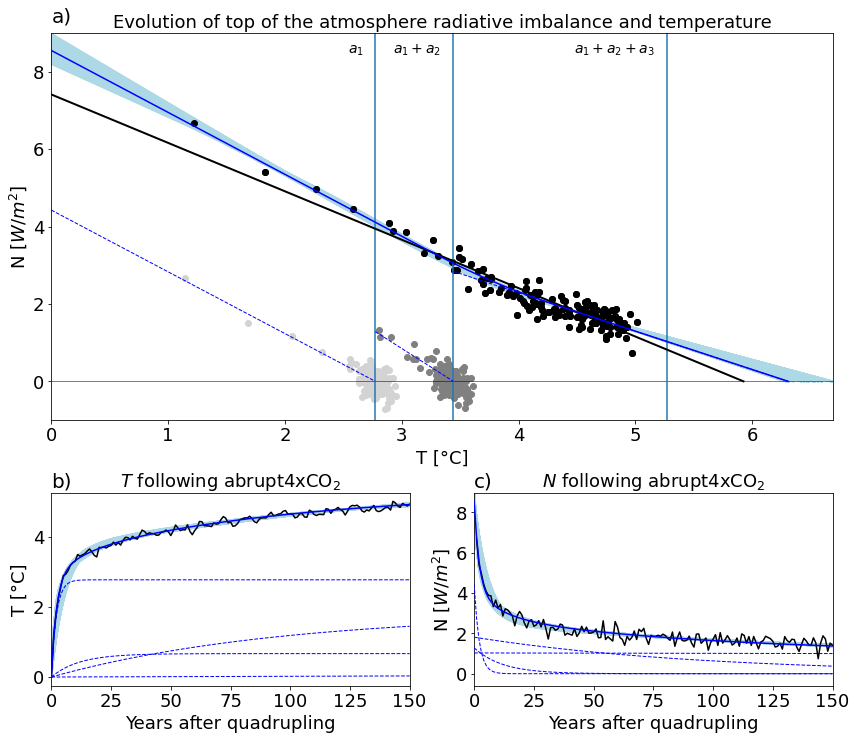

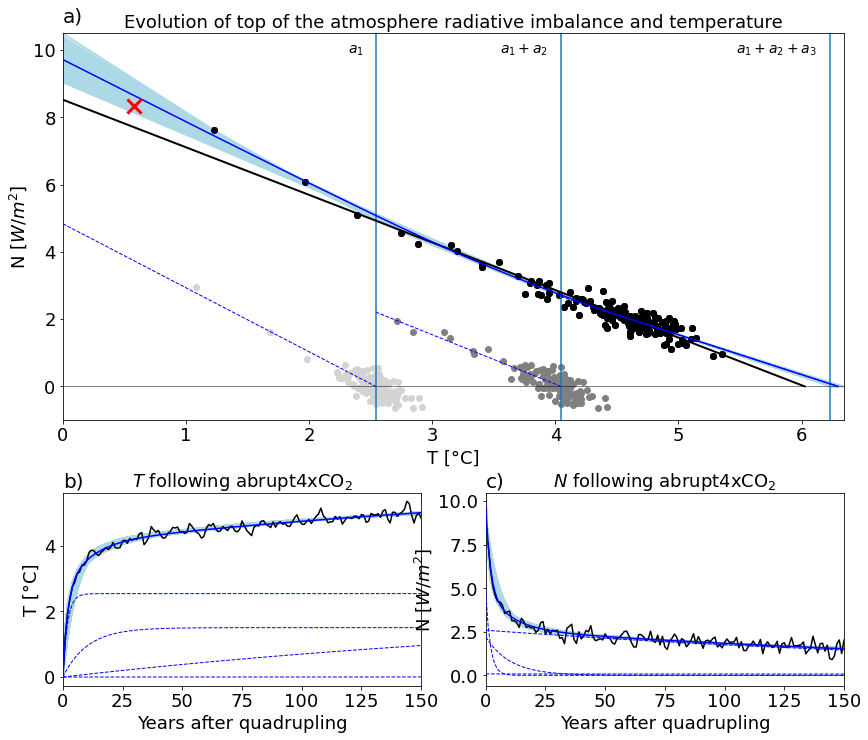

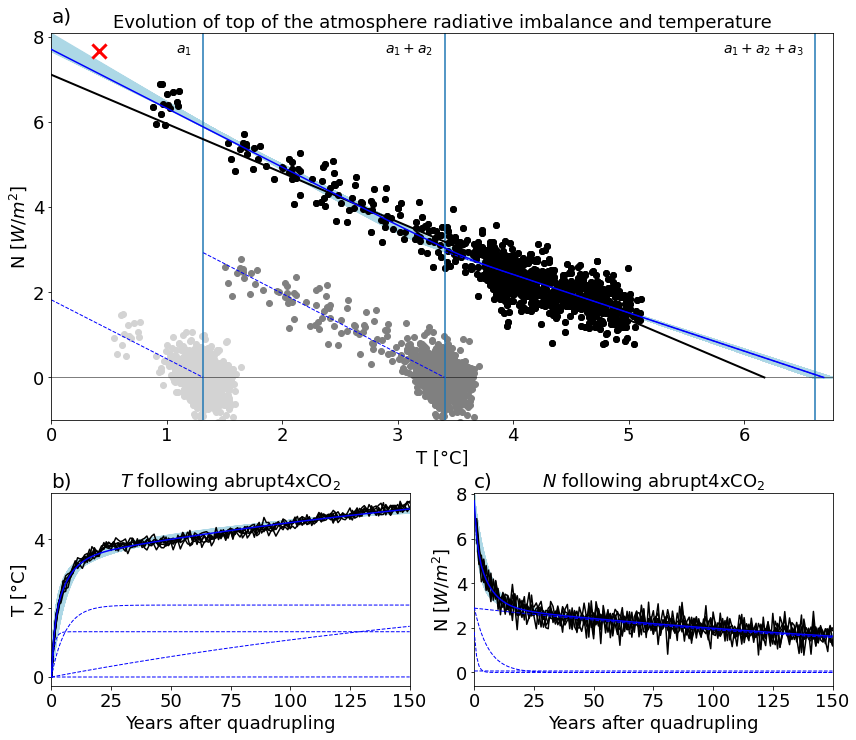

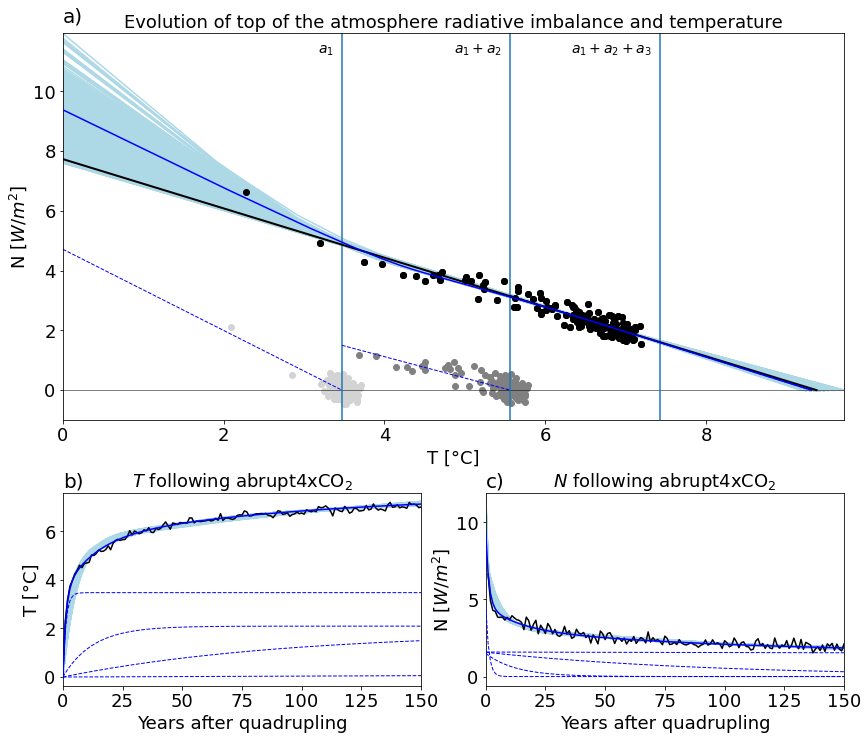

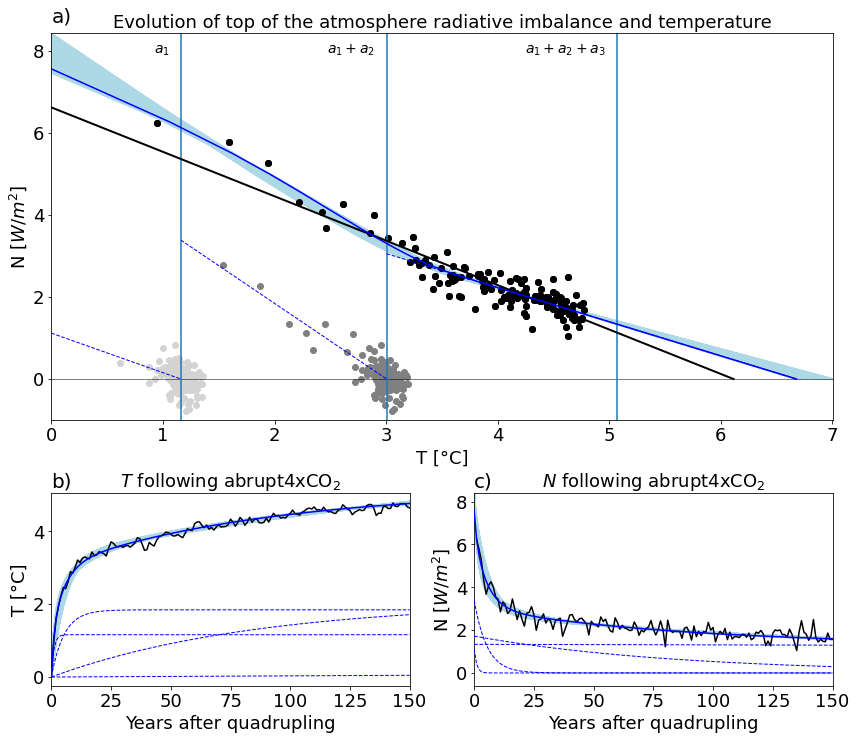

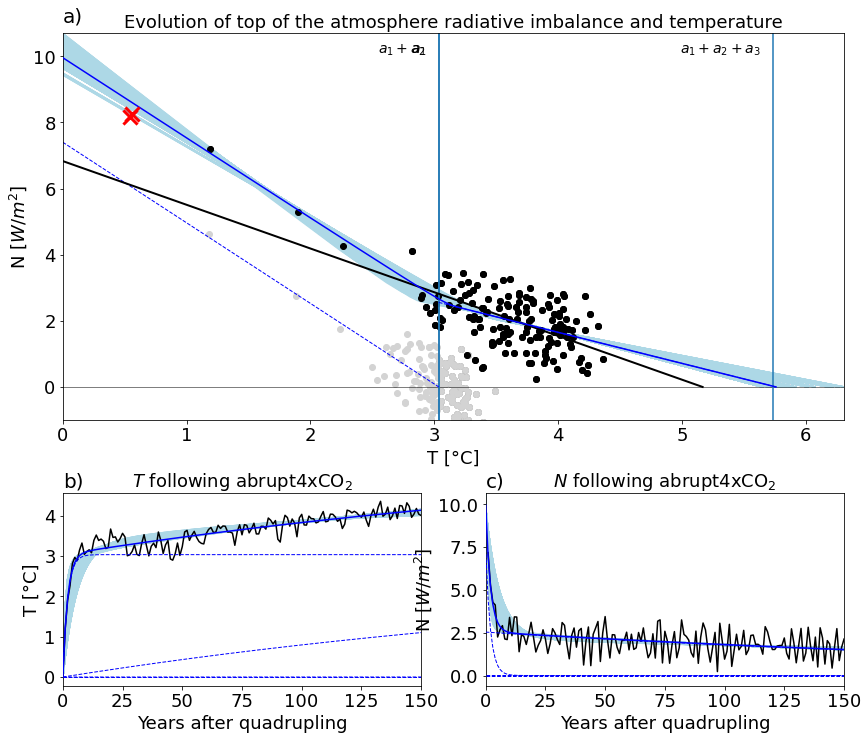

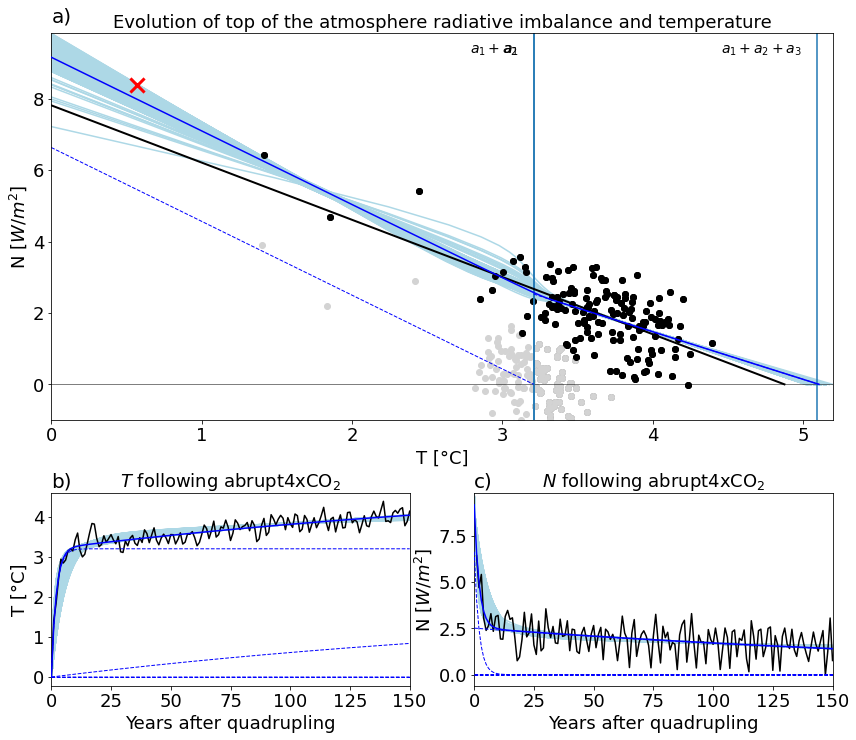

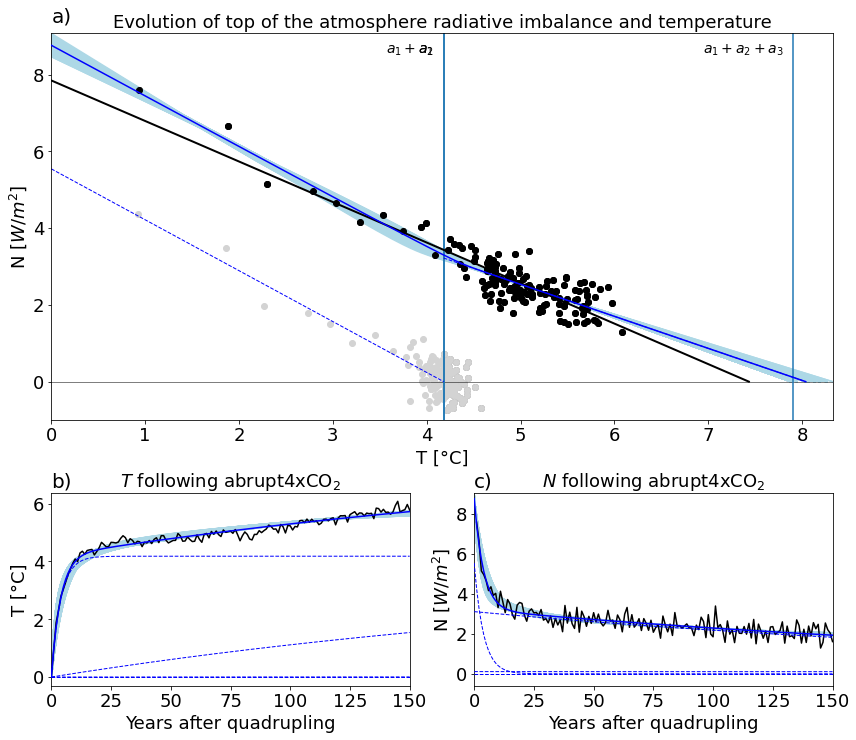

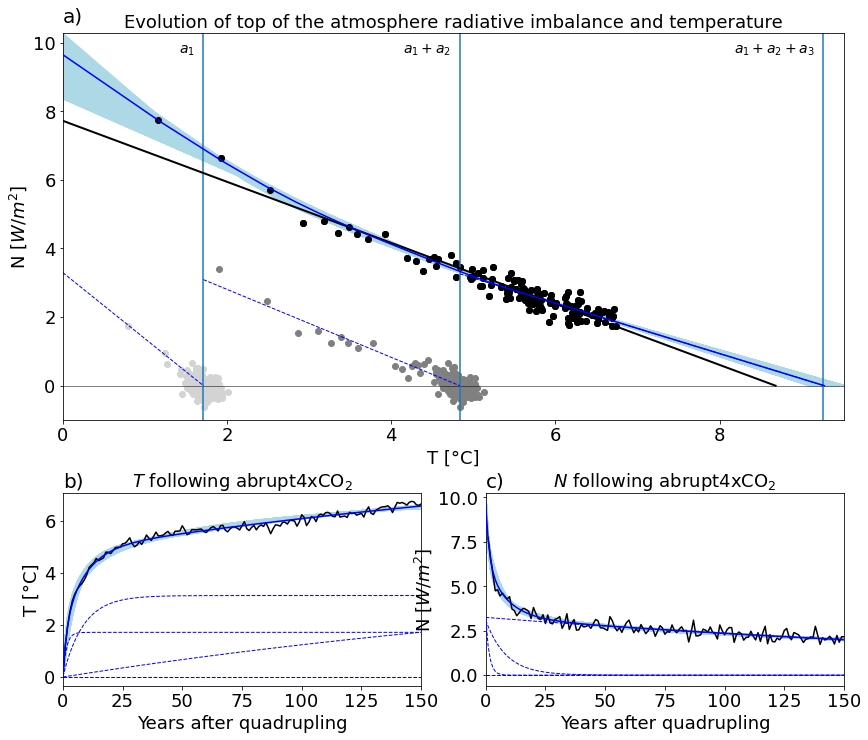

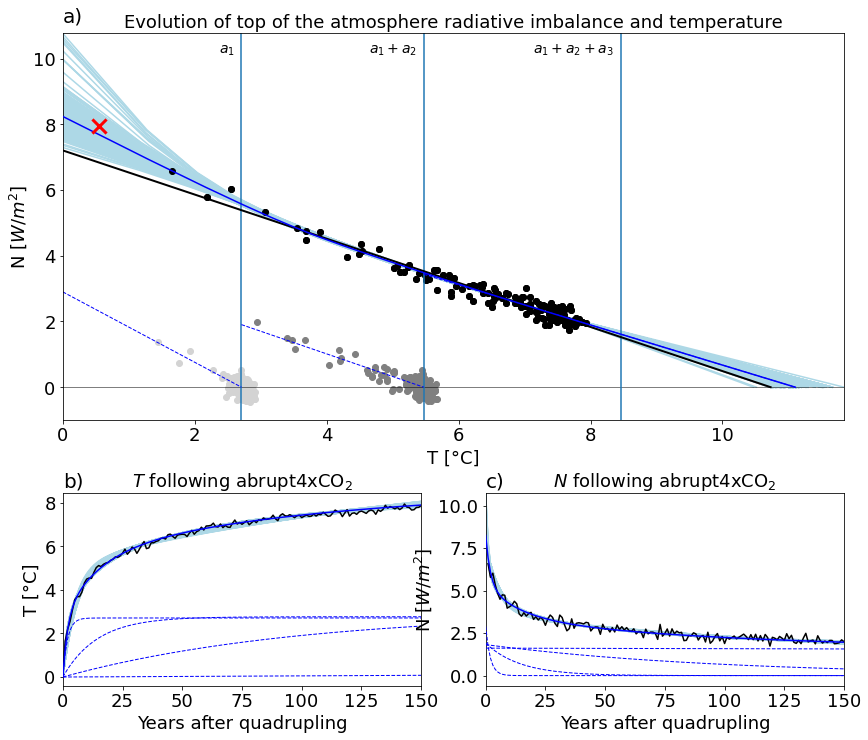

In [332]:
create_newfile = True
save_filename = 'best_estimated_parameters_allmembers.txt'
savefig = False
letters = ['a)', 'b)', 'c)']

#for model in ['NorESM2-LM']:
for model in model_names:
    print(model)
    filename = model + '_1000parameters.txt';
    fileinclpath = '../Estimates/1000parameters_4xCO2_allmembers/' + filename
    if os.path.isfile(fileinclpath) == False:
        #print(model)
        continue
    df_par = pd.read_table(fileinclpath,index_col=0)
    members = f.find_members(model, exp)
    if model == 'GISS-E2-1-G':
        # exclude member which seems to start after year 150
        members.remove('r1i1p1f3')
    
    # find maximum values that needs to be plotted
    T2x_max = np.max(df_par.loc[:,'T2x'])
    F2x_max = np.max(df_par.loc[:,'F2x'])
    best_rnorm = np.min(df_par['rnorm']);

    fig = plt.figure(figsize = [14,12]);
    #make outer gridspec
    outer = gridspec.GridSpec(2, 1, height_ratios = [2, 1],  hspace = 0.25) 
    #make nested gridspecs
    gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[0], hspace = 0.1)
    gs2 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = outer[1], wspace = 0.18)

    Gax = fig.add_subplot(gs1[0]); Gax = f.Gregory_subplot(Gax, x_max = 2*T2x_max, y_max = 2*F2x_max)
    Tax = fig.add_subplot(gs2[0]); Tax = f.tasresponse_subplot(Tax)
    Nax = fig.add_subplot(gs2[1]); Nax = f.toaradresponse_subplot(Nax, y_max = 2*F2x_max)

    Tax = f.plot_Tvstime(Tax, model, exp, members, include_mean = False)
    Nax = f.plot_Nvstime(Nax, model, exp, members, include_mean = False)
    Gax = f.plot_NvsT(Gax, model, exp, members)

    # include fixed-SST forcing if available:
    f.fixedSSTestimate4xCO2(model, members, plotting_axis = Gax)

    for (l,axis) in enumerate([Gax, Tax, Nax]):
        axis.text(0,1.03,letters[l],transform=axis.transAxes, fontsize=20)

    for ii in range(df_par.shape[0]):
        taulist = df_par.loc[ii,'tau1':'tau4']; a_n = df_par.loc[ii,'a_1':'a_4']; b_n = df_par.loc[ii,'b_1':'b_4']
        F2x = df_par.loc[ii,'F2x']; T2x = df_par.loc[ii,'T2x'];
        Gax = f.plot_NvsTfit(Gax, taulist, a_n, b_n)
        Nax = f.plot_Nfit(Nax, taulist, b_n, include_components = False, color = 'lightblue')
        Tax = f.plot_Tfit(Tax, taulist, a_n, include_components = False, color = 'lightblue')

        if df_par.loc[ii,'rnorm'] == best_rnorm:
            Gax = f.plot_NvsTfit(Gax, taulist, a_n, b_n, color = 'blue', linewidth=2, zorder = 3)
            Nax = f.plot_Nfit(Nax, taulist, b_n, include_components = True, color = 'blue',linewidth=2, zorder = 3)
            Tax = f.plot_Tfit(Tax, taulist, a_n, include_components = True, color = 'blue',linewidth=2, zorder = 3)

            estimates, Gax = f.fbpar_estimation(model, exp, members, plotting_axis = Gax, fixed_timescales = taulist[:3])
            gF2x, gT2x, linfit = f.Gregory_linreg(model, exp, members)
            Gax.plot([0, 2*gT2x], linfit, linewidth=2, color = "black")
            #print(gF2x, gT2x)
            # put results in pandas dataframe:
            columnnames = ['tau1', 'tau2', 'tau3', 'tau4', 'a_1', 'a_2', 'a_3', 'a_4', 'b_1', 'b_2', 'b_3', 'b_4', 'F2x', 'T2x', 'GregoryF2x', 'GregoryT2x'];
            dataframe = pd.DataFrame([np.concatenate((taulist, a_n, b_n, F2x, T2x, gF2x, gT2x), axis=None)], index = [model], columns=columnnames)

            # if file is not already created, create a new file to store the results in:
            if create_newfile == True:
                dataframe.to_csv('../Estimates/' + save_filename, sep='\t')
                create_newfile = False
            else:
                # if file exists already, load instead exising file and append results: 
                loaded_dataframe = pd.read_table('../Estimates/' + save_filename,index_col=0)
                if (loaded_dataframe.index == model).any():
                    loaded_dataframe = loaded_dataframe.drop([model]) # if model already has a row that I want to remove
                loaded_dataframe = loaded_dataframe.append(dataframe)

                # write them to a file:
                loaded_dataframe.to_csv('../Estimates/' + save_filename, sep='\t')   

    if savefig == True:
        plt.savefig('../Figures/Gregory_and_linresponses_allmembers/' + model + '_' + exp + '_gregory_linresponses.pdf', format='pdf', dpi=600, bbox_inches="tight")
    # if second mode has zero amplitude (a_n[1]==0), then remove this mode from linear model
        


In [ ]:
# Difference from CMIP5 analyses:
# average over members when fitting the temperature response
# use all points available when estimating feedback parameters

## Code for one model only

['r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2', 'r4i1p1f2', 'r5i1p1f2', 'r6i1p1f2']


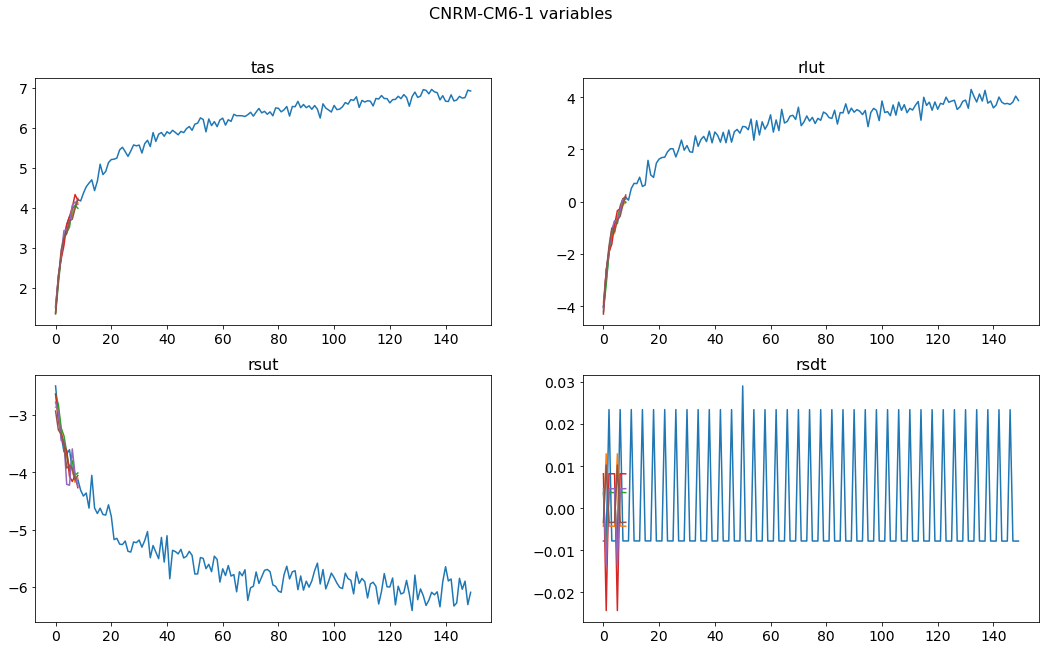

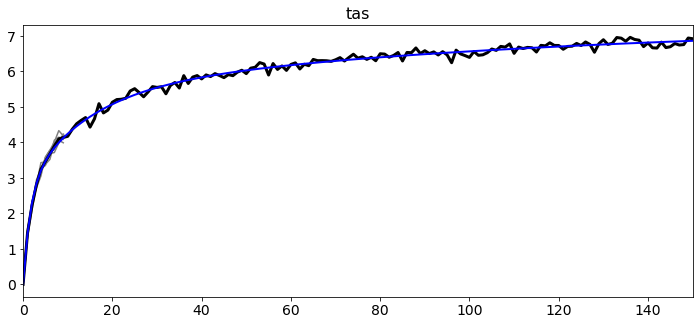

In [293]:

#model = 'CanESM5';
#model = 'IPSL-CM6A-LR'
#model = 'GISS-E2-1-G'
#model = 'FIO-ESM-2-0'
#model = 'CAMS-CSM1-0'
#model = 'FGOALS-f3-L'
#model = 'MRI-ESM2-0'
#model = 'ACCESS-CM2'
model = 'CNRM-CM6-1'

# check which members are available:
members = f.find_members(model, exp)
print(members)

if model == 'GISS-E2-1-G':
    # exclude member which seems to start after year 150
    members.remove('r1i1p1f3')
    #filenames.remove('GISS-E2-1-G_abrupt-4xCO2_r1i1p1f3_anomalies.txt')
    
f.plot_allvar(model, exp, members)

var = 'tas'; stopyear = 150
years = np.arange(1, stopyear + 1); years0 = np.arange(0, stopyear + 1)

fig, ax = plt.subplots(figsize = [12,5])
ax.set_xlim(0,stopyear)
ax.set_title(var, fontsize = 16)
ax.tick_params(axis='both',labelsize=14)
#ax.set_ylim(0,9)
   
for (mb, member) in enumerate(members):
    data = f.load_anom(model, exp, member, length_restriction = stopyear)
    deltaT0 = np.concatenate([[0],data[var]])
    ax.plot(years0[:len(deltaT0)], deltaT0, color = 'gray') 
    
meanT0 = f.mean_4xCO2tas(model, members, length_restriction = stopyear)
ax.plot(years0, meanT0, color='black', linewidth = 3);


dim = 3
taulist = f.random_tau(dim)
# compute predictors (1 - np.exp((-t/tau[i])) of the linear model
tas_pred = f.tas_predictors(t = years0, fixed_par = taulist);
# find parameters a_n in: deltaT = \sum_i a_n[i]*(1 - np.exp((-t/tau[i]))
a_n, rnorm1 = optimize.nnls(tas_pred,meanT0) # non-negative least squares, to ensure positive parameters
Ti = np.array([tas_pred[:,i]*a_n[i] for i in range(0,dim)]) # compute components
Tsum = tas_pred@a_n # sum of all components

ax.plot(Tsum, color = 'blue', linewidth = 2);
